In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.widgets import Slider
import calendar

In [10]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='bWgy1bvk-hCxPXI4Gh0vplDA9o9B3YDf7ucoz4GBvV42',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'puneairpollutionanalysisaqipredic-donotdelete-pr-x92vb7xbcejyi2'
object_key = 'Pune_hist_pollution_data_now.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df = df.drop(df.columns[0], axis=1)

In [11]:
df.head()

datetime   pm2_5    pm10    no2   so2      co   no     o3    nh3
0  2020-11-27 00:30:00   83.16   92.36  16.79  7.87  594.14  0.0  70.10  14.06
1  2020-11-27 01:30:00   90.66   99.77  14.91  7.63  594.14  0.0  67.23  14.31
2  2020-11-27 02:30:00   97.52  106.75  13.37  7.75  607.49  0.0  62.94  12.79
3  2020-11-27 03:30:00  101.66  111.12  12.51  7.75  614.17  0.0  57.22  11.40
4  2020-11-27 04:30:00  103.59  113.04  12.51  7.51  627.52  0.0  52.21  10.13

In [14]:
df.tail()

datetime  pm2_5  pm10   no2   so2      co    no     o3   nh3
31093  2024-06-30 13:30:00   1.62  2.22  3.13  3.76  230.31  0.82  35.76  0.98
31094  2024-06-30 14:30:00   1.60  2.23  3.60  3.70  233.65  0.70  33.62  1.01
31095  2024-06-30 15:30:00   1.61  2.34  3.94  3.52  233.65  0.52  31.11  1.06
31096  2024-06-30 16:30:00   1.84  2.72  4.54  3.43  236.99  0.44  29.68  1.12
31097  2024-06-30 17:30:00   2.19  3.23  5.57  3.46  240.33  0.29  27.90  1.17

In [15]:
df.head()

datetime   pm2_5    pm10    no2   so2      co   no     o3    nh3
0  2020-11-27 00:30:00   83.16   92.36  16.79  7.87  594.14  0.0  70.10  14.06
1  2020-11-27 01:30:00   90.66   99.77  14.91  7.63  594.14  0.0  67.23  14.31
2  2020-11-27 02:30:00   97.52  106.75  13.37  7.75  607.49  0.0  62.94  12.79
3  2020-11-27 03:30:00  101.66  111.12  12.51  7.75  614.17  0.0  57.22  11.40
4  2020-11-27 04:30:00  103.59  113.04  12.51  7.51  627.52  0.0  52.21  10.13

In [16]:
df.describe()

pm2_5          pm10           no2           so2            co  \
count  31098.000000  31098.000000  31098.000000  31098.000000  31098.000000   
mean      66.367196     84.524631     21.113343     15.523306    773.963276   
std       67.827088     98.876443     20.854051     13.101570    688.323526   
min        0.950000  -9999.000000      0.770000      0.980000    170.230000   
25%       10.320000     15.002500      5.830000      6.200000    280.380000   
50%       48.275000     67.320000     13.880000     11.920000    514.030000   
75%       97.115000    123.317500     30.160000     20.740000   1014.710000   
max      670.220000    727.740000    260.470000    146.870000   5928.040000   

                 no            o3           nh3  
count  31098.000000  31098.000000  31098.000000  
mean       5.580898     51.020764     11.826720  
std       14.421461     77.732628     16.593936  
min        0.000000  -9999.000000      0.000000  
25%        0.030000     14.130000      1.810000  
50%        0.370000     29.680000      4.940000  
75%        2.180000     77.250000     15.450000  
max      162.720000    360.490000    170.230000

In [17]:
df.replace(-9999.00000, np.nan, inplace=True)

In [18]:
df.describe()

pm2_5          pm10           no2           so2            co  \
count  31098.000000  31097.000000  31098.000000  31098.000000  31098.000000   
mean      66.367196     84.848892     21.113343     15.523306    773.963276   
std       67.827088     80.665777     20.854051     13.101570    688.323526   
min        0.950000      1.590000      0.770000      0.980000    170.230000   
25%       10.320000     15.010000      5.830000      6.200000    280.380000   
50%       48.275000     67.320000     13.880000     11.920000    514.030000   
75%       97.115000    123.320000     30.160000     20.740000   1014.710000   
max      670.220000    727.740000    260.470000    146.870000   5928.040000   

                 no            o3           nh3  
count  31098.000000  31097.000000  31098.000000  
mean       5.580898     51.343947     11.826720  
std       14.421461     52.861624     16.593936  
min        0.000000      0.000000      0.000000  
25%        0.030000     14.130000      1.810000  
50%        0.370000     29.680000      4.940000  
75%        2.180000     77.250000     15.450000  
max      162.720000    360.490000    170.230000

In [19]:
df.isnull().sum()

datetime    0
pm2_5       0
pm10        1
no2         0
so2         0
co          0
no          0
o3          1
nh3         0
dtype: int64

In [20]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31098 entries, 0 to 31097
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  31098 non-null  datetime64[ns]
 1   pm2_5     31098 non-null  float64       
 2   pm10      31097 non-null  float64       
 3   no2       31098 non-null  float64       
 4   so2       31098 non-null  float64       
 5   co        31098 non-null  float64       
 6   no        31098 non-null  float64       
 7   o3        31097 non-null  float64       
 8   nh3       31098 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 2.1 MB


In [22]:
df.set_index('datetime', inplace=True) #Time Series Data

In [23]:
df = df.interpolate(method='time') #Handling 2 null values

In [24]:
df.isnull().sum()

pm2_5    0
pm10     0
no2      0
so2      0
co       0
no       0
o3       0
nh3      0
dtype: int64

In [25]:
daily_data = df.resample('D').mean()

In [26]:
daily_data.head(10)

pm2_5        pm10        no2        so2           co  \
datetime                                                                
2020-11-27   77.131667   83.515833  12.990000   8.903750   543.655417   
2020-11-28   64.346250   66.737083   7.179167   9.528333   456.036250   
2020-11-29   46.002083   52.082083  18.847083  12.000833   871.877083   
2020-11-30   76.275833   91.263333  34.300000  17.385000  1363.655833   
2020-12-01   92.257917  108.876667  37.153750  19.789583  1289.109167   
2020-12-02  111.170833  129.535833  40.462500  18.851250  1291.057500   
2020-12-03  129.347917  150.517917  50.166667  23.578333  1579.642917   
2020-12-04  159.675417  182.508333  54.807500  26.812500  1748.620833   
2020-12-05  138.945417  156.728333  37.752500  18.426667  1255.730833   
2020-12-06  116.145833  130.881250  36.916667  18.130417  1229.724583   

                   no         o3        nh3  
datetime                                     
2020-11-27   0.488750  69.201250   8.009583  
2020-11-28   0.057083  77.547917   4.049583  
2020-11-29   3.799583  50.762083   9.139583  
2020-11-30  10.548750  35.852083  13.186667  
2020-12-01   9.691667  36.974583  13.725833  
2020-12-02  10.194583  39.157500  16.760417  
2020-12-03  16.207083  45.277500  22.069167  
2020-12-04  16.336250  45.499583  26.188333  
2020-12-05   6.713333  49.590000  19.908750  
2020-12-06   7.126250  49.224583  19.683750

In [27]:
daily_data.describe()

pm2_5         pm10          no2          so2           co  \
count  1308.000000  1308.000000  1308.000000  1308.000000  1308.000000   
mean     66.480034    84.959532    21.133455    15.513679   773.924394   
std      57.772588    68.063776    14.447938     9.495868   514.064589   
min       1.825417     2.826667     1.767500     1.465833   194.430417   
25%      11.054063    16.171354     8.197083     6.931875   289.872604   
50%      57.523125    79.610833    19.014792    15.000417   668.058958   
75%      99.691354   125.847396    30.308854    21.282083  1121.486771   
max     320.085000   356.292500    93.318333    53.682917  2782.385000   

                no           o3          nh3  
count  1308.000000  1308.000000  1308.000000  
mean      5.544733    51.215476    11.866617  
std       7.803101    27.328364    11.553831  
min       0.000000     2.429583     0.692917  
25%       0.471042    27.127500     1.989583  
50%       2.134167    46.201667     8.432708  
75%       7.836250    74.837917    18.035313  
max      54.723750   131.016250    68.998333

In [28]:
daily_data.shape

(1312, 8)

In [29]:
daily_data.isnull().sum()

pm2_5    4
pm10     4
no2      4
so2      4
co       4
no       4
o3       4
nh3      4
dtype: int64

In [30]:
daily_data = daily_data.interpolate(method='time') #Handling 2 null values

In [31]:
daily_data.isnull().sum()

pm2_5    0
pm10     0
no2      0
so2      0
co       0
no       0
o3       0
nh3      0
dtype: int64

In [32]:
plt.rcParams['figure.figsize'] = [15, 6]
sns.set(style="whitegrid")

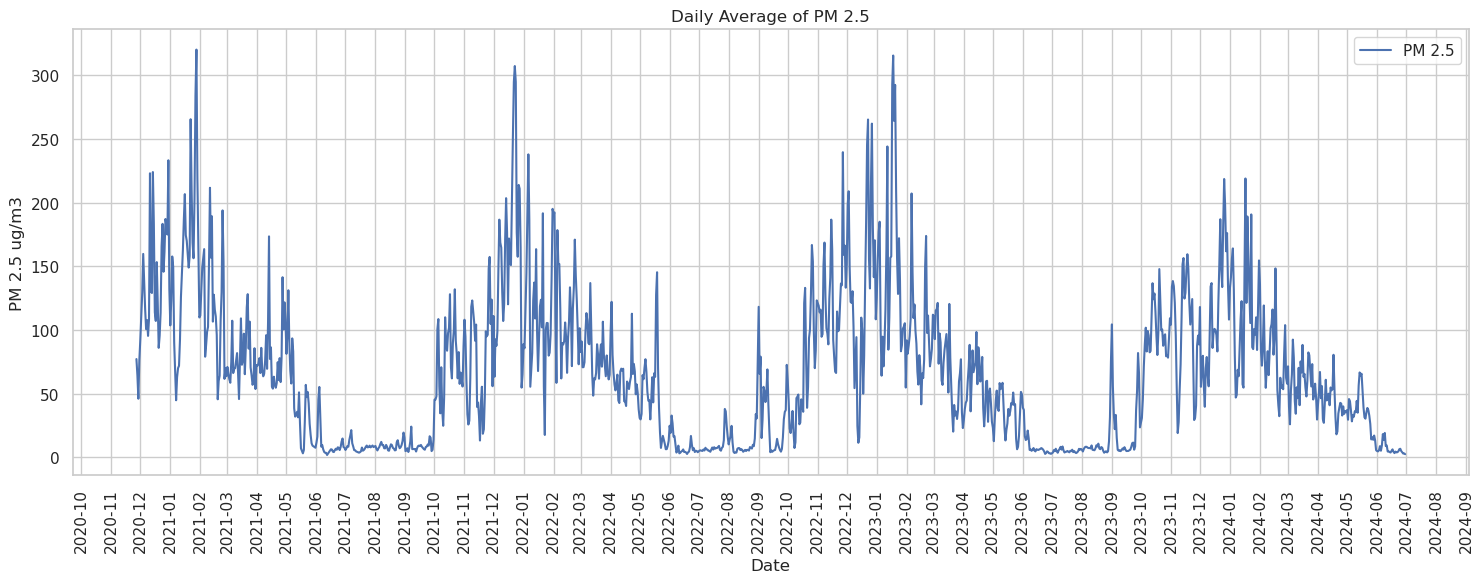

In [33]:
plt.figure()  # Create a new figure
plt.plot(daily_data.index, daily_data['pm2_5'], label='PM 2.5')
plt.title('Daily Average of PM 2.5')
plt.xlabel('Date')
plt.ylabel('PM 2.5 ug/m3')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()  # Adjust layout
plt.show()

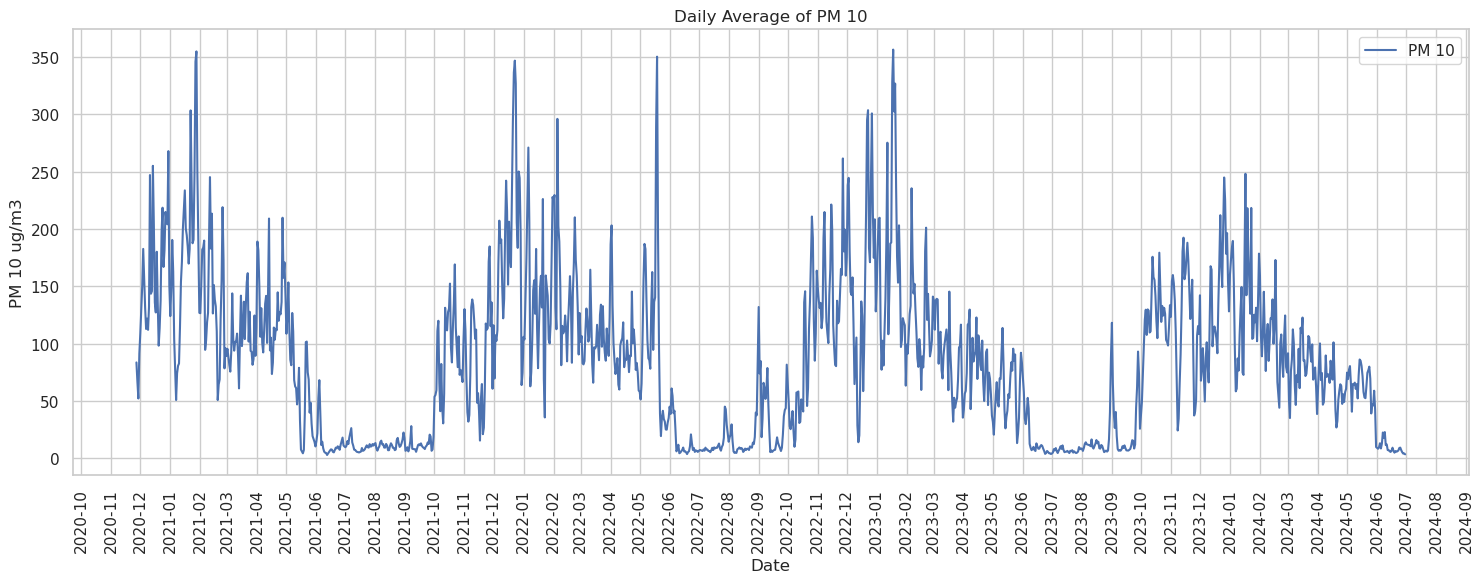

In [34]:
plt.figure()  # Create a new figure
plt.plot(daily_data.index, daily_data['pm10'], label='PM 10')
plt.title('Daily Average of PM 10')
plt.xlabel('Date')
plt.ylabel('PM 10 ug/m3')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()  # Adjust layout
plt.show()

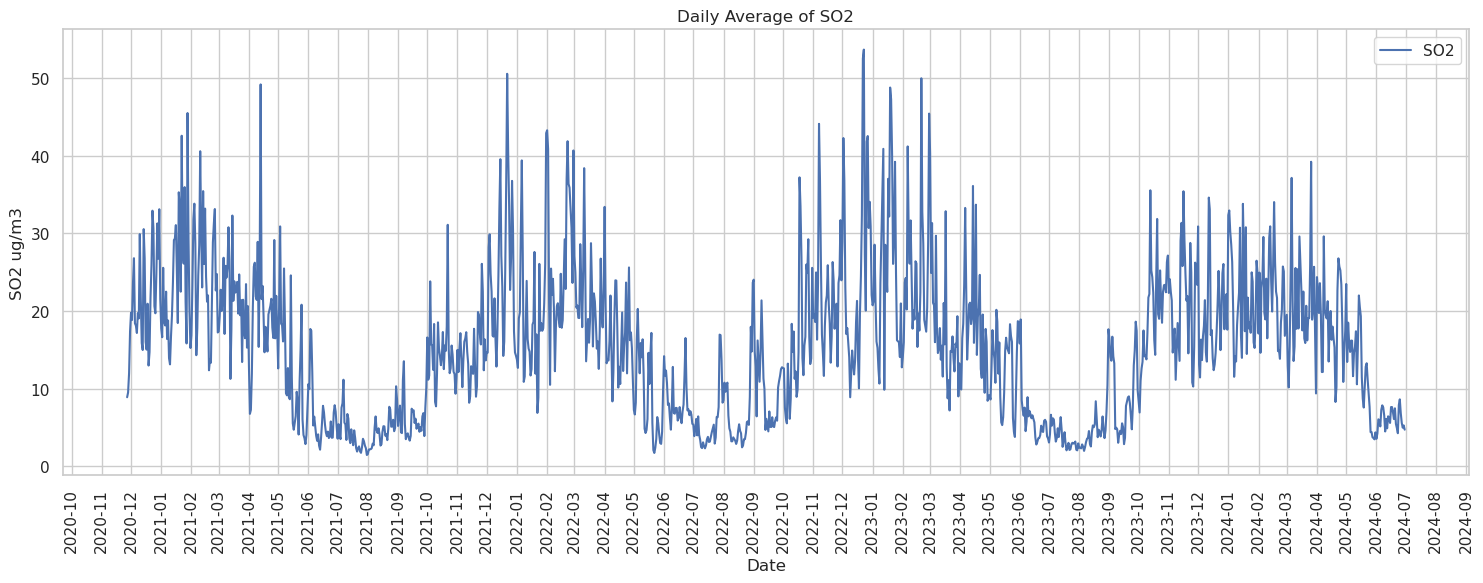

In [35]:
plt.figure()  # Create a new figure
plt.plot(daily_data.index, daily_data['so2'], label='SO2')
plt.title('Daily Average of SO2')
plt.xlabel('Date')
plt.ylabel('SO2 ug/m3')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()  # Adjust layout
plt.show()

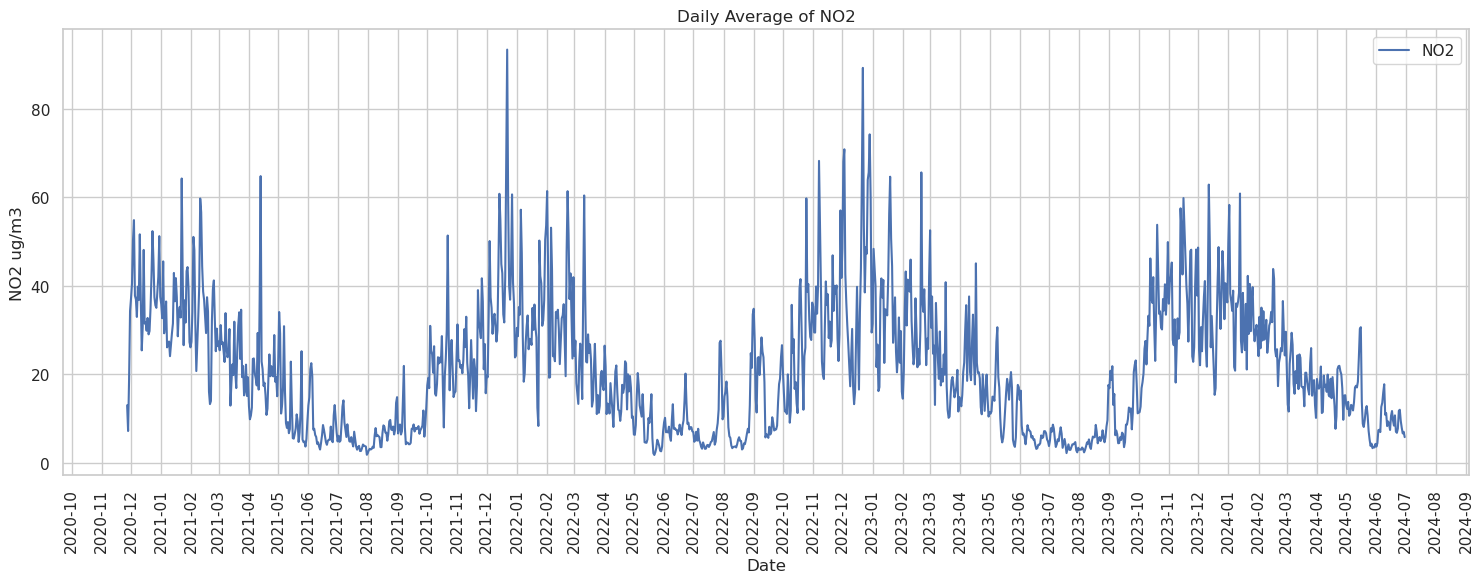

In [36]:
plt.figure()  # Create a new figure
plt.plot(daily_data.index, daily_data['no2'], label='NO2')
plt.title('Daily Average of NO2')
plt.xlabel('Date')
plt.ylabel('NO2 ug/m3')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()  # Adjust layout
plt.show()

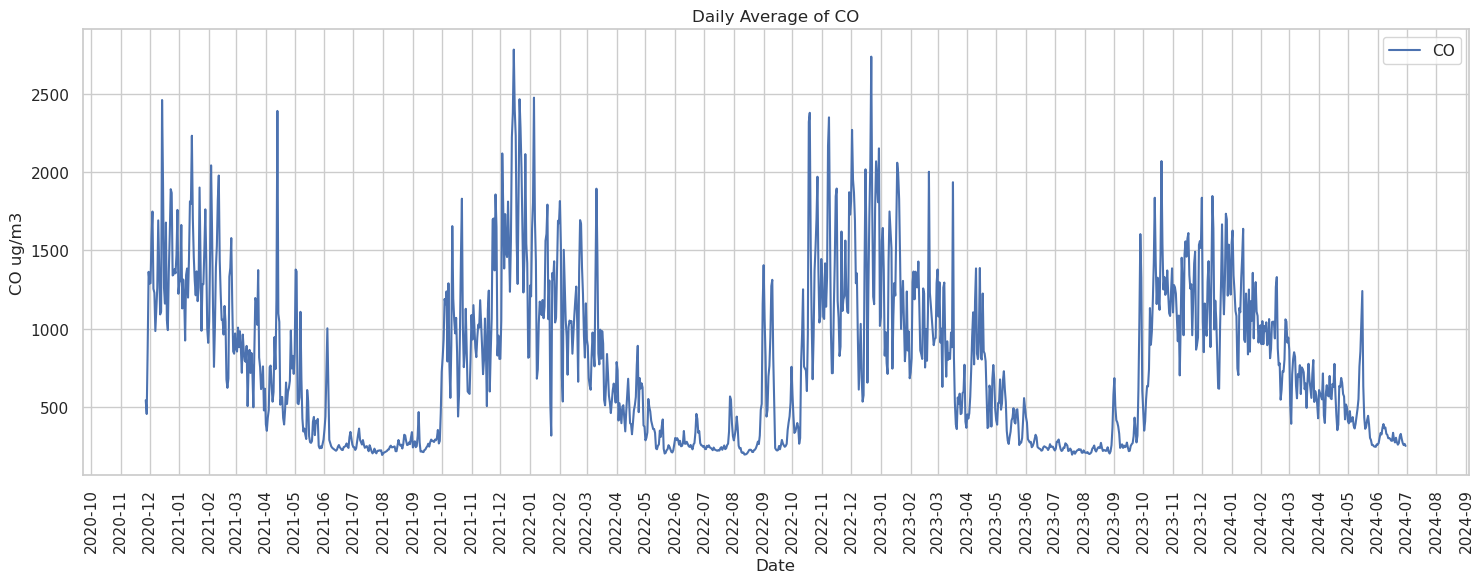

In [37]:
plt.figure()  # Create a new figure
plt.plot(daily_data.index, daily_data['co'], label='CO')
plt.title('Daily Average of CO')
plt.xlabel('Date')
plt.ylabel('CO ug/m3')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()  # Adjust layout
plt.show()

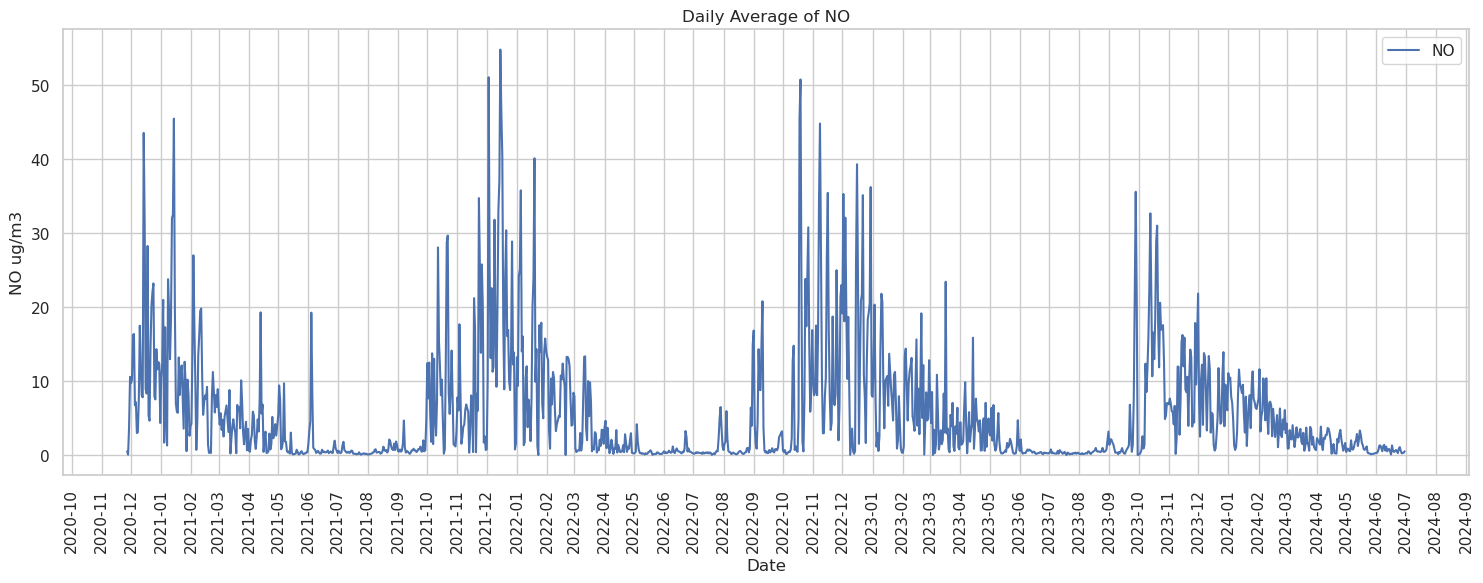

In [38]:
plt.figure()  # Create a new figure
plt.plot(daily_data.index, daily_data['no'], label='NO')
plt.title('Daily Average of NO')
plt.xlabel('Date')
plt.ylabel('NO ug/m3')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()  # Adjust layout
plt.show()

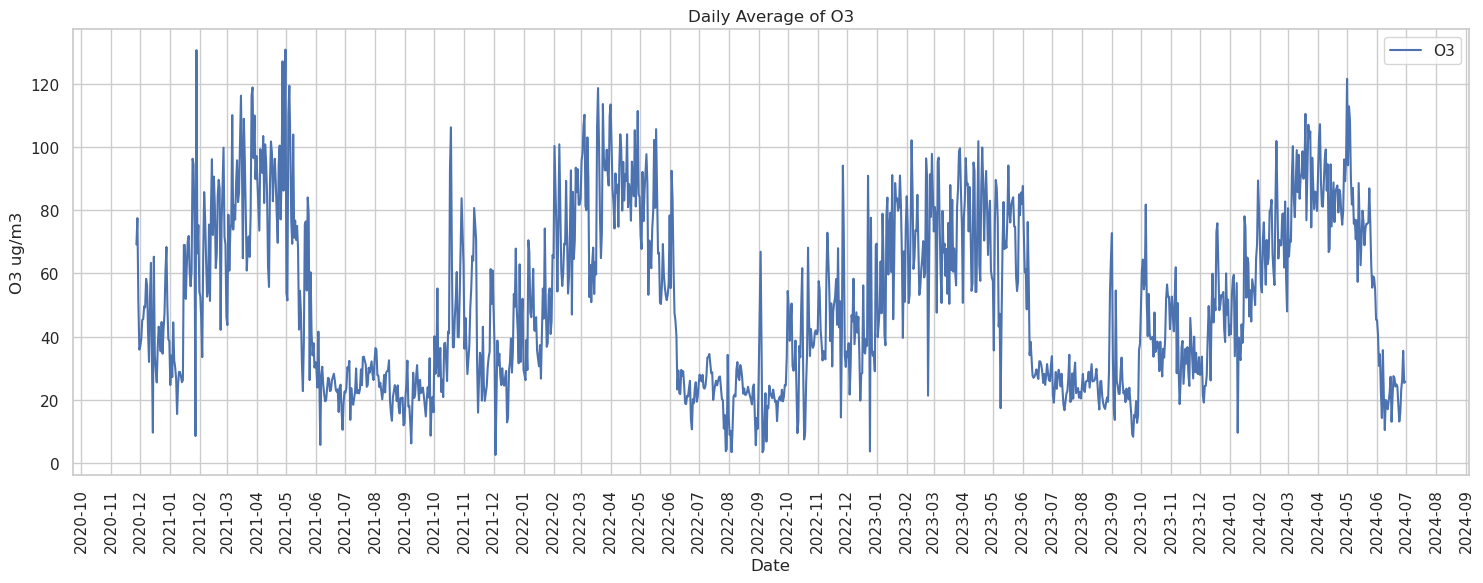

In [39]:
plt.figure()  # Create a new figure
plt.plot(daily_data.index, daily_data['o3'], label='O3')
plt.title('Daily Average of O3')
plt.xlabel('Date')
plt.ylabel('O3 ug/m3')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()  # Adjust layout
plt.show()

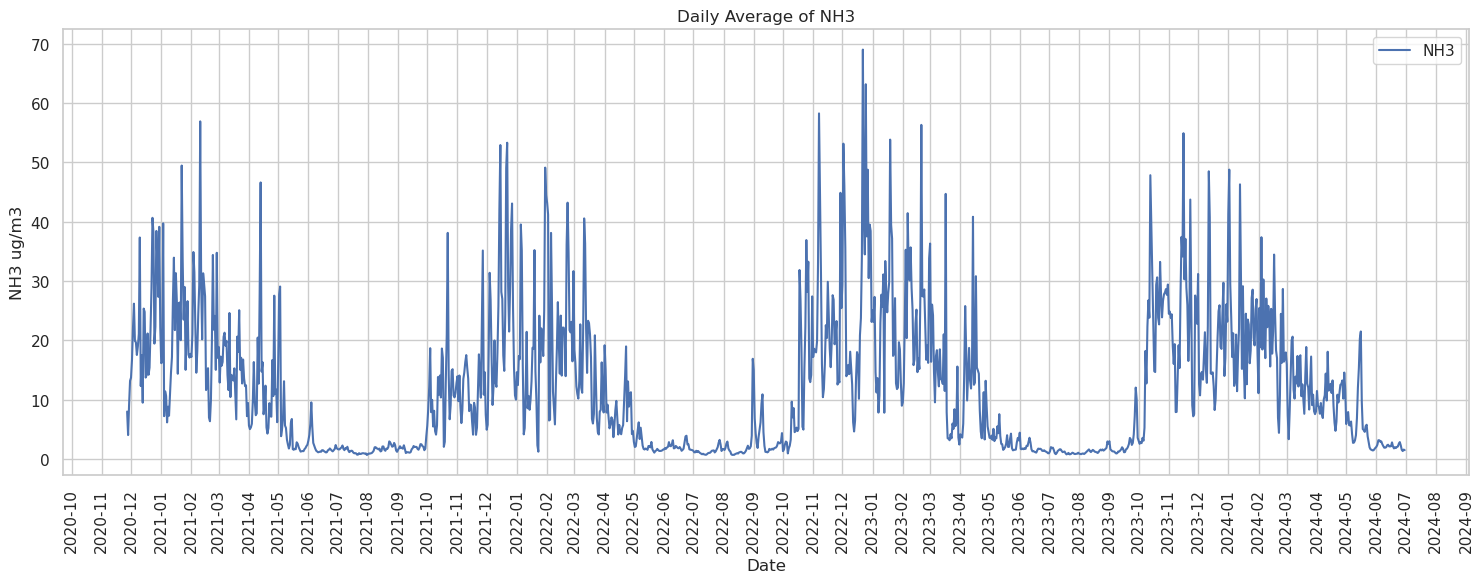

In [40]:
plt.figure()  # Create a new figure
plt.plot(daily_data.index, daily_data['nh3'], label='NH3')
plt.title('Daily Average of NH3')
plt.xlabel('Date')
plt.ylabel('NH3 ug/m3')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()  # Adjust layout
plt.show()

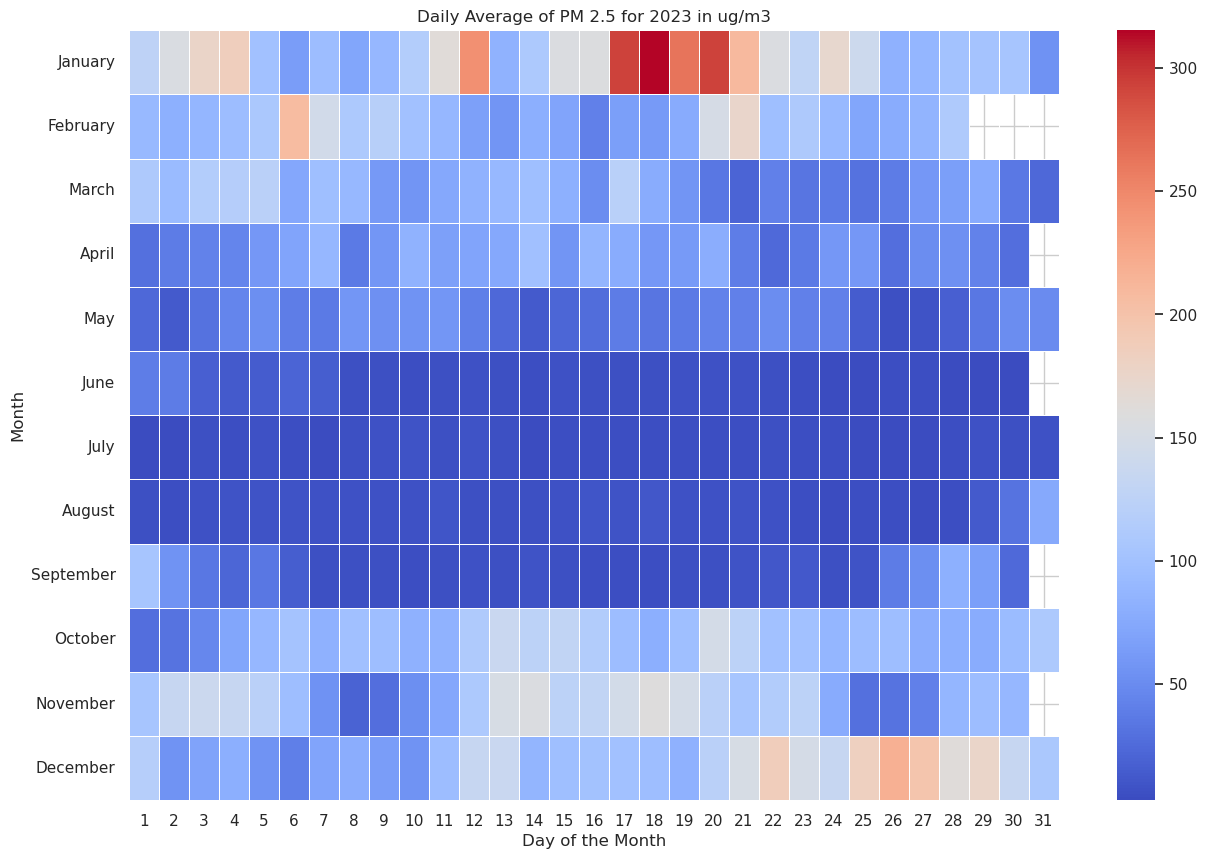

In [41]:
pollutant = 'pm2_5'
year = 2023
daily_data_2023 = daily_data[daily_data.index.year == year].copy()

daily_data_2023.loc[:, 'day'] = daily_data_2023.index.day
daily_data_2023.loc[:, 'month'] = daily_data_2023.index.month
pivot_table = daily_data_2023.pivot(index='month', columns='day', values=pollutant)   #creating pivot table: month as row and day of month as column

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False, linewidths=0.5)  #heatmap in coolwarm fashion

plt.title('Daily Average of PM 2.5 for 2023 in ug/m3')
plt.xlabel('Day of the Month')
plt.ylabel('Month')
plt.yticks(ticks=[i + 0.5 for i in range(12)], labels=[calendar.month_name[i] for i in range(1, 13)], rotation=0)

plt.show()

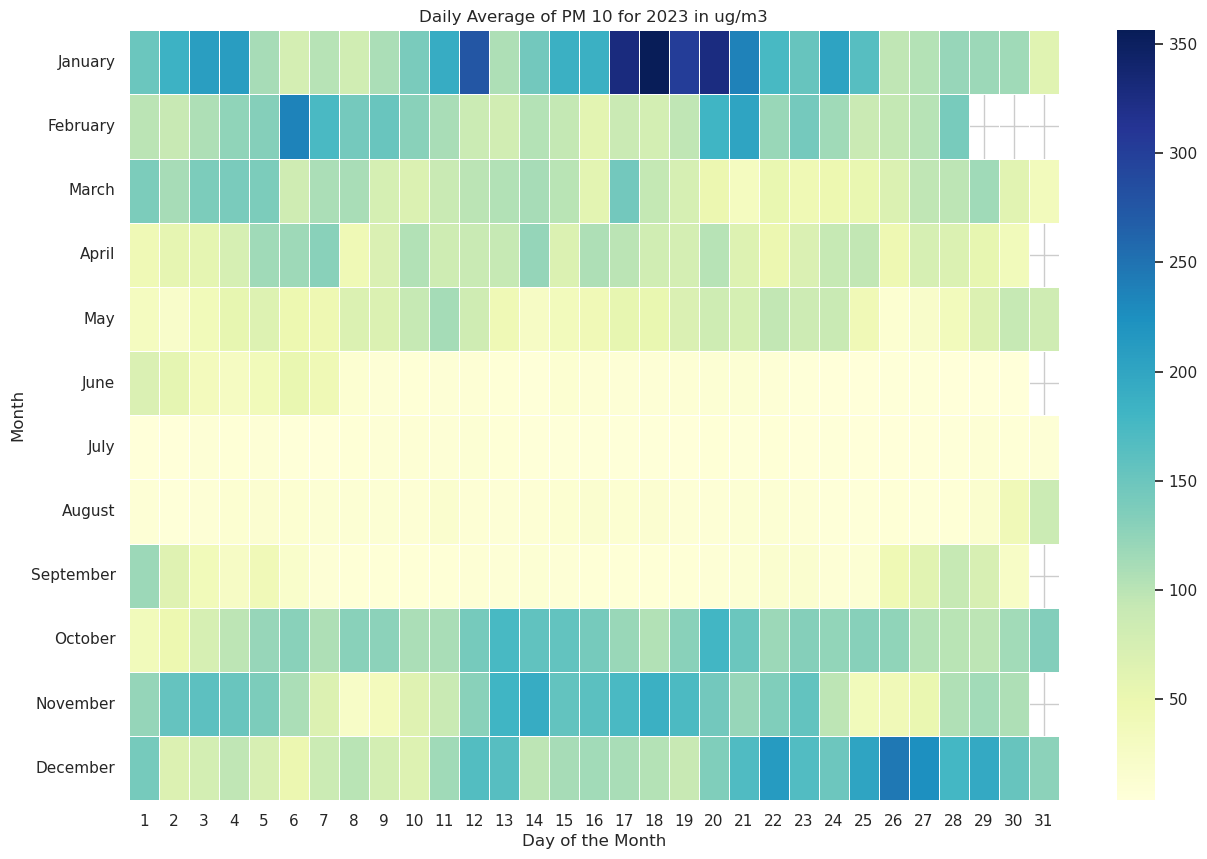

In [42]:
pollutant = 'pm10'
year = 2023
daily_data_2023 = daily_data[daily_data.index.year == year].copy()

daily_data_2023.loc[:, 'day'] = daily_data_2023.index.day
daily_data_2023.loc[:, 'month'] = daily_data_2023.index.month

pivot_table_pm10 = daily_data_2023.pivot(index='month', columns='day', values=pollutant)

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table_pm10, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title(f'Daily Average of PM 10 for 2023 in ug/m3')
plt.xlabel('Day of the Month')
plt.ylabel('Month')
plt.yticks(ticks=[i + 0.5 for i in range(12)], labels=[calendar.month_name[i] for i in range(1, 13)], rotation=0)

plt.show()

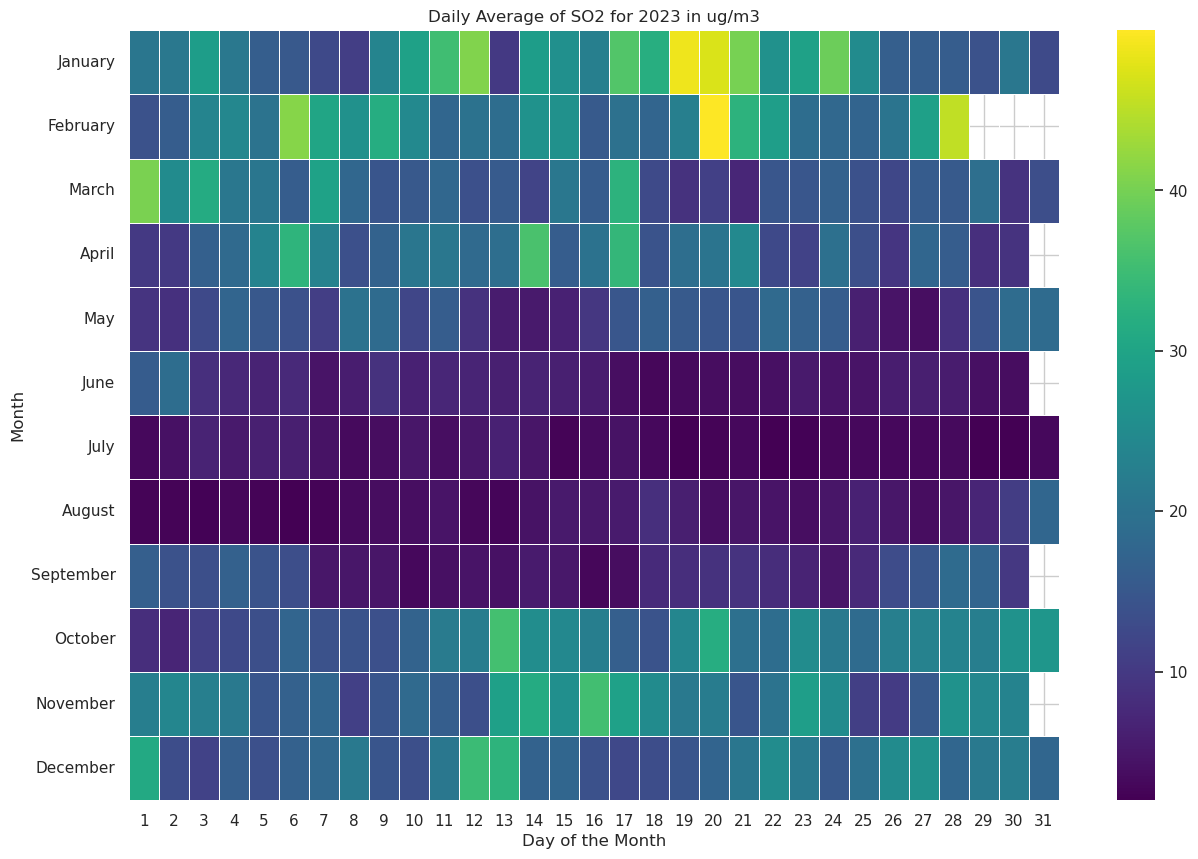

In [43]:
pollutant = 'so2'
year = 2023
daily_data_2023 = daily_data[daily_data.index.year == year].copy()

daily_data_2023.loc[:, 'day'] = daily_data_2023.index.day
daily_data_2023.loc[:, 'month'] = daily_data_2023.index.month

pivot_table_pm10 = daily_data_2023.pivot(index='month', columns='day', values=pollutant)

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table_pm10, cmap='viridis', annot=False, linewidths=0.5)
plt.title('Daily Average of SO2 for 2023 in ug/m3')
plt.xlabel('Day of the Month')
plt.ylabel('Month')
plt.yticks(ticks=[i + 0.5 for i in range(12)], labels=[calendar.month_name[i] for i in range(1, 13)], rotation=0)

plt.show()

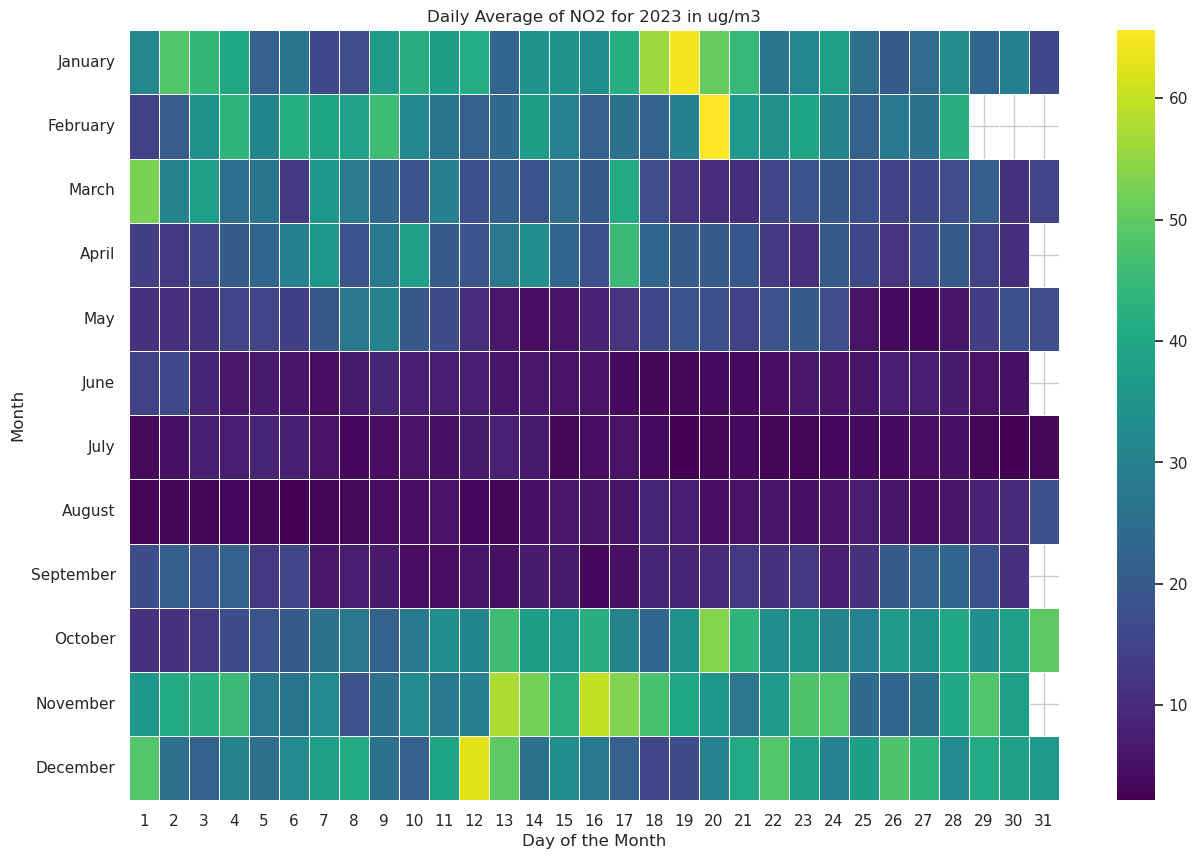

In [44]:
pollutant = 'no2'
year = 2023
daily_data_2023 = daily_data[daily_data.index.year == year].copy()

daily_data_2023.loc[:, 'day'] = daily_data_2023.index.day
daily_data_2023.loc[:, 'month'] = daily_data_2023.index.month

pivot_table_pm10 = daily_data_2023.pivot(index='month', columns='day', values=pollutant)

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table_pm10, cmap='viridis', annot=False, linewidths=0.5)
plt.title('Daily Average of NO2 for 2023 in ug/m3')
plt.xlabel('Day of the Month')
plt.ylabel('Month')
plt.yticks(ticks=[i + 0.5 for i in range(12)], labels=[calendar.month_name[i] for i in range(1, 13)], rotation=0)

plt.show()

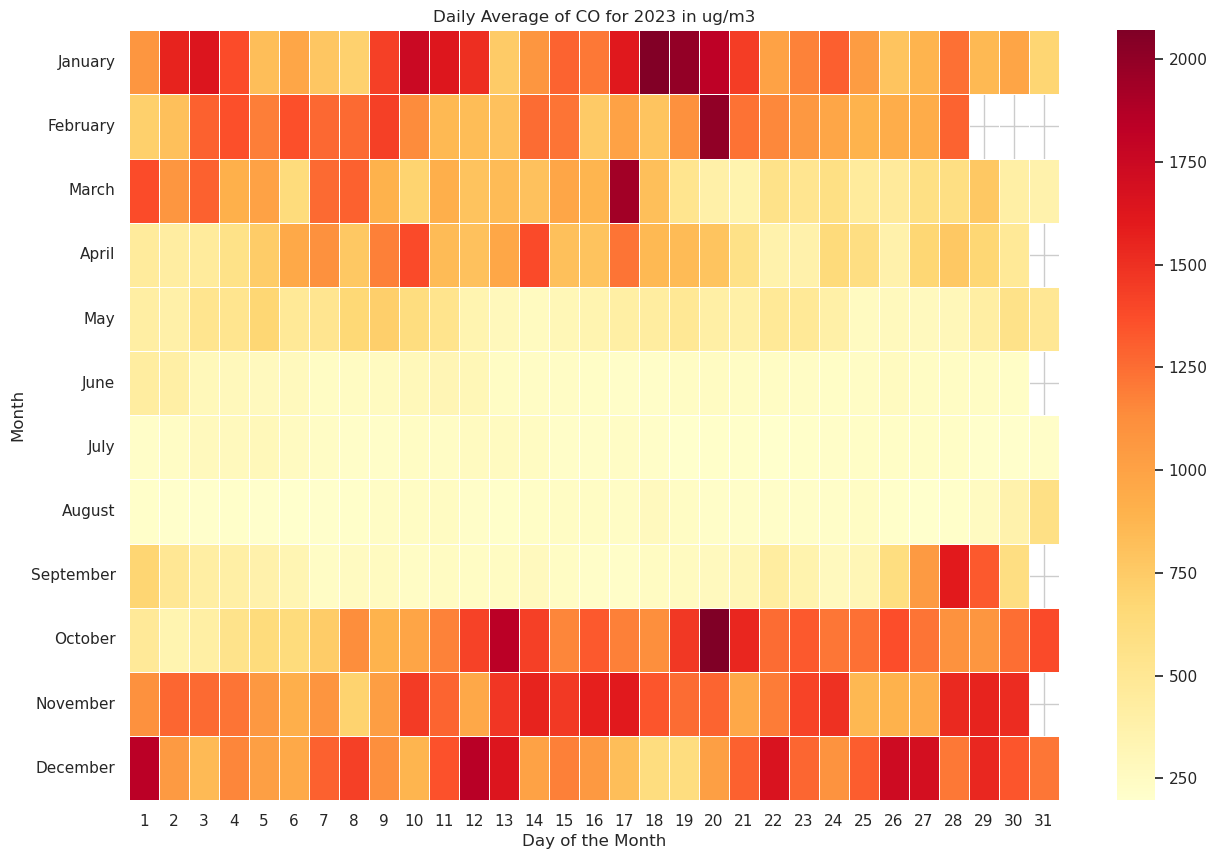

In [45]:
pollutant = 'co'
year = 2023
daily_data_2023 = daily_data[daily_data.index.year == year].copy()

daily_data_2023.loc[:, 'day'] = daily_data_2023.index.day
daily_data_2023.loc[:, 'month'] = daily_data_2023.index.month

pivot_table_pm10 = daily_data_2023.pivot(index='month', columns='day', values=pollutant)

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table_pm10, cmap='YlOrRd', annot=False, linewidths=0.5)
plt.title(f'Daily Average of CO for 2023 in ug/m3')
plt.xlabel('Day of the Month')
plt.ylabel('Month')
plt.yticks(ticks=[i + 0.5 for i in range(12)], labels=[calendar.month_name[i] for i in range(1, 13)], rotation=0)

plt.show()

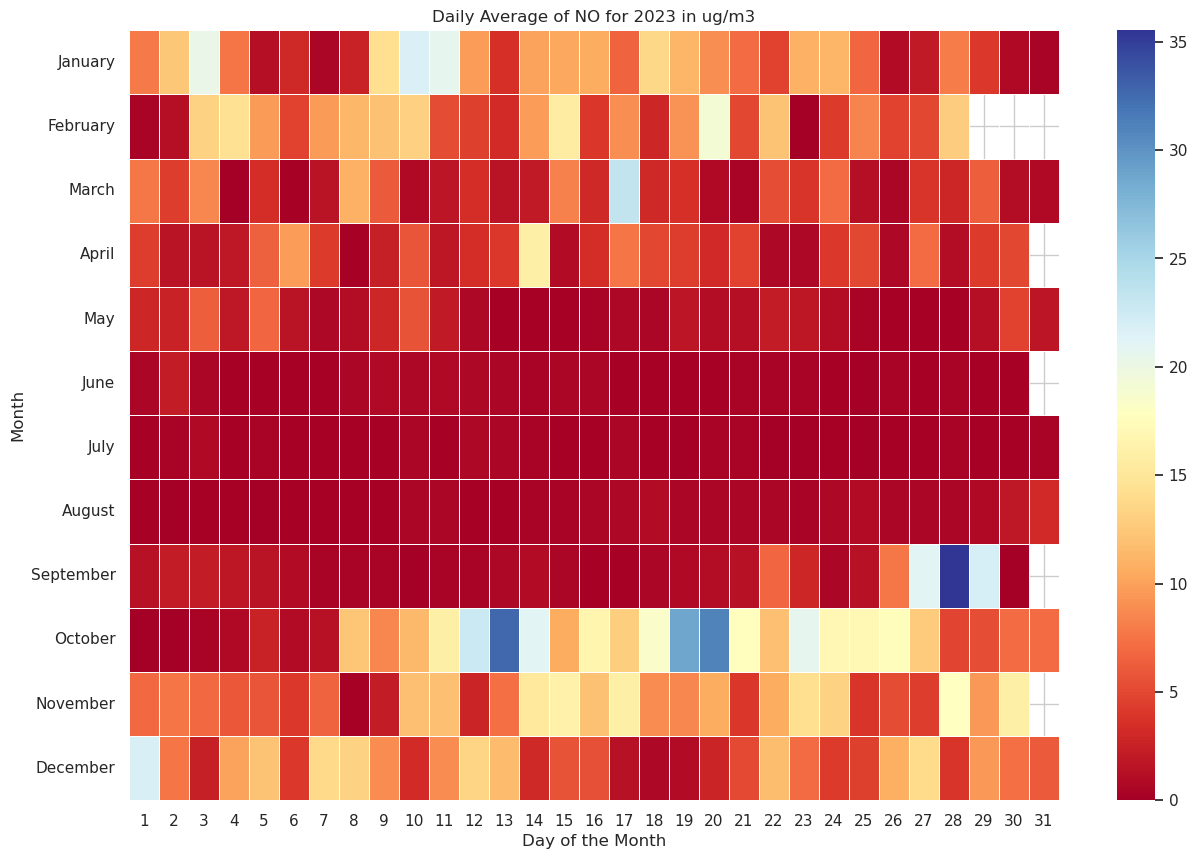

In [46]:
pollutant = 'no'
year = 2023
daily_data_2023 = daily_data[daily_data.index.year == year].copy()

daily_data_2023.loc[:, 'day'] = daily_data_2023.index.day
daily_data_2023.loc[:, 'month'] = daily_data_2023.index.month

pivot_table_pm10 = daily_data_2023.pivot(index='month', columns='day', values=pollutant)

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table_pm10, cmap='RdYlBu', annot=False, linewidths=0.5)
plt.title('Daily Average of NO for 2023 in ug/m3')
plt.xlabel('Day of the Month')
plt.ylabel('Month')
plt.yticks(ticks=[i + 0.5 for i in range(12)], labels=[calendar.month_name[i] for i in range(1, 13)], rotation=0)

plt.show()

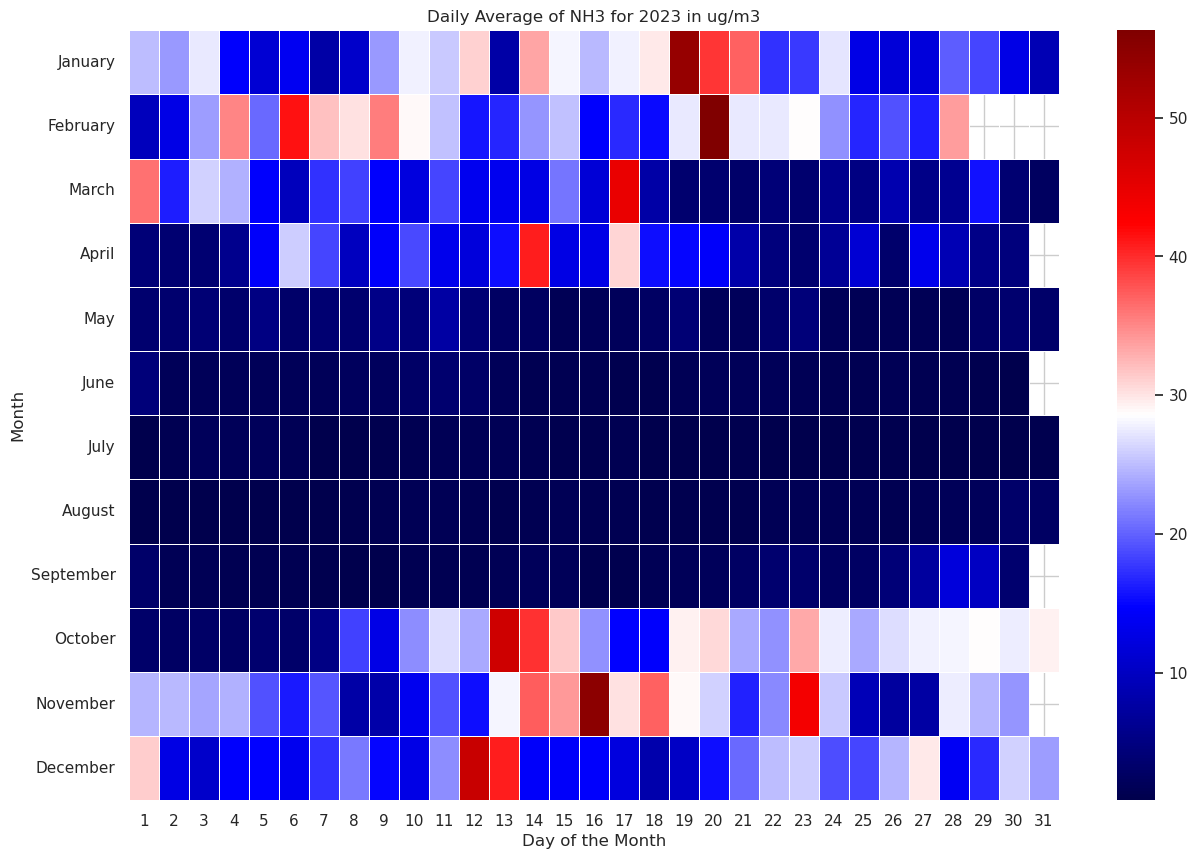

In [47]:
pollutant = 'nh3'
year = 2023
daily_data_2023 = daily_data[daily_data.index.year == year].copy()

daily_data_2023.loc[:, 'day'] = daily_data_2023.index.day
daily_data_2023.loc[:, 'month'] = daily_data_2023.index.month

pivot_table_pm10 = daily_data_2023.pivot(index='month', columns='day', values=pollutant)

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table_pm10, cmap='seismic', annot=False, linewidths=0.5)
plt.title('Daily Average of NH3 for 2023 in ug/m3')
plt.xlabel('Day of the Month')
plt.ylabel('Month')
plt.yticks(ticks=[i + 0.5 for i in range(12)], labels=[calendar.month_name[i] for i in range(1, 13)], rotation=0)

plt.show()

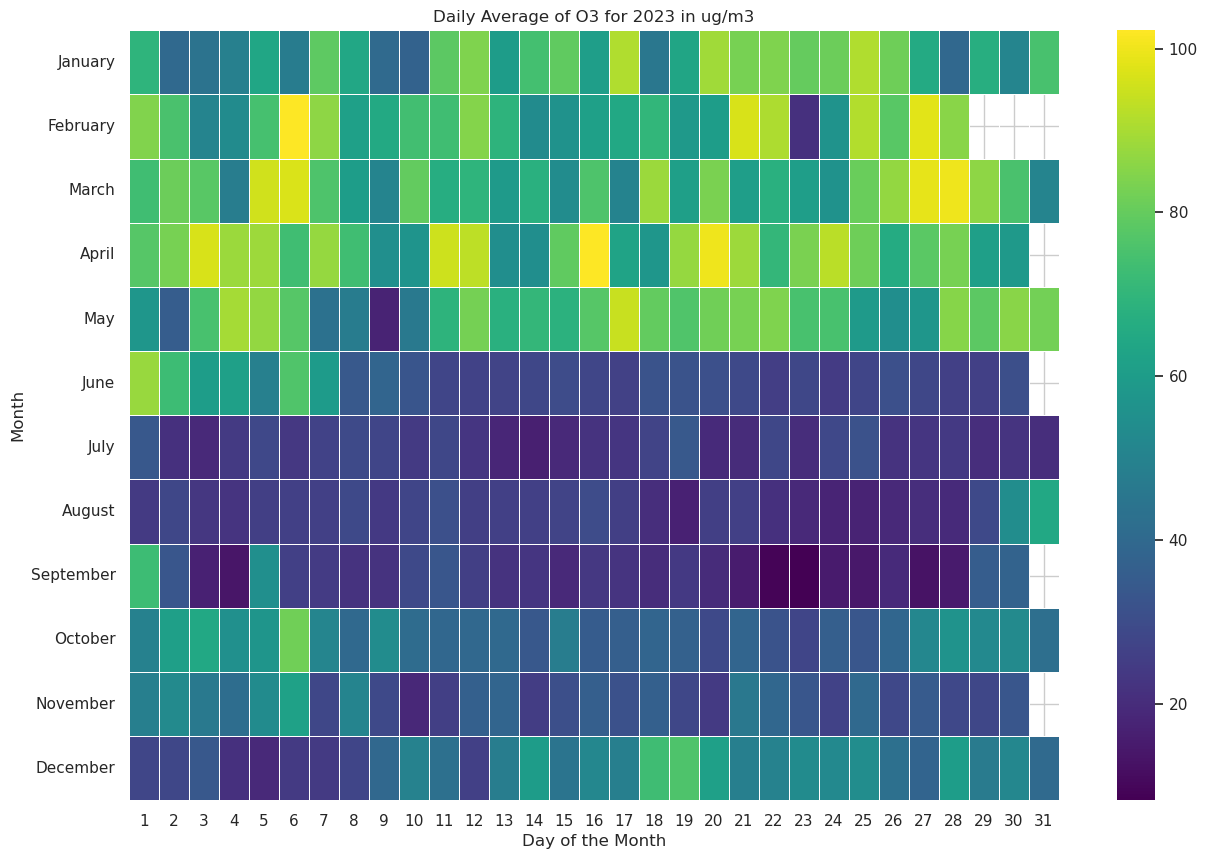

In [48]:
pollutant = 'o3'
year = 2023
daily_data_2023 = daily_data[daily_data.index.year == year].copy()

daily_data_2023.loc[:, 'day'] = daily_data_2023.index.day
daily_data_2023.loc[:, 'month'] = daily_data_2023.index.month
pivot_table = daily_data_2023.pivot(index='month', columns='day', values=pollutant)   #creating pivot table: month as row and day of month as column

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, cmap='viridis', annot=False, linewidths=0.5)  #heatmap in coolwarm fashion

plt.title('Daily Average of O3 for 2023 in ug/m3')
plt.xlabel('Day of the Month')
plt.ylabel('Month')
plt.yticks(ticks=[i + 0.5 for i in range(12)], labels=[calendar.month_name[i] for i in range(1, 13)], rotation=0)

plt.show()

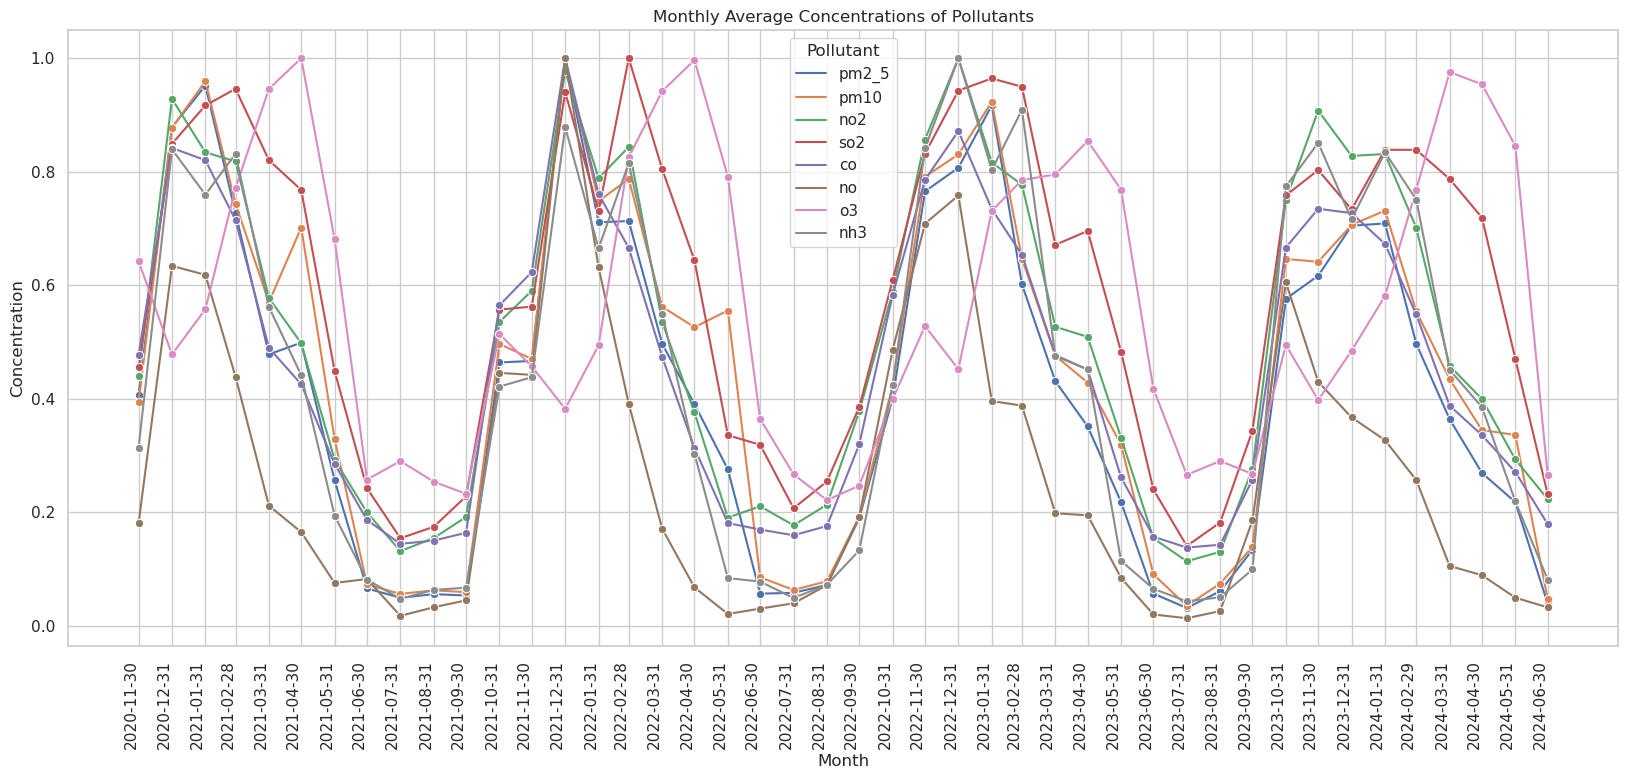

In [49]:
monthly_data = daily_data.resample('M').mean()
normalized_monthly_data = monthly_data / monthly_data.max() # Mormalize data to get all pollutants in same scale

normalized_monthly_data.reset_index(inplace=True)

monthly_melted = pd.melt(normalized_monthly_data, id_vars=['datetime'], var_name='Pollutant', value_name='Concentration')

plt.figure(figsize=(20, 8))
sns.lineplot(data=monthly_melted, x='datetime', y='Concentration', hue='Pollutant', marker='o')

plt.title('Monthly Average Concentrations of Pollutants')
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.xticks(rotation=45)
plt.legend(title='Pollutant')
plt.grid(True)

plt.xticks(pd.date_range(start=normalized_monthly_data['datetime'].min(), end=normalized_monthly_data['datetime'].max(), freq='M').to_pydatetime(),
           rotation=90, ha='right')

plt.show()

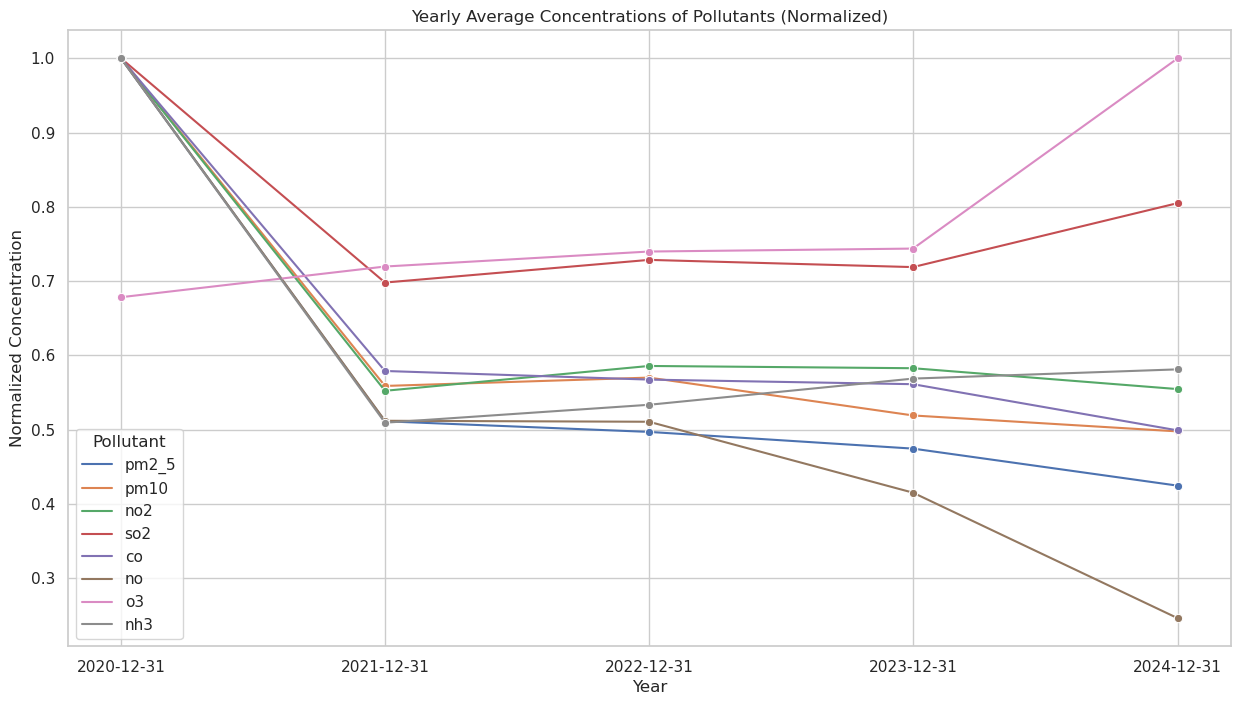

In [50]:
yearly_data = daily_data.resample('Y').mean()
normalized_yearly_data = yearly_data/yearly_data.max()
normalized_yearly_data.reset_index(inplace=True)

normalized_yearly_data['datetime'] = pd.to_datetime(normalized_yearly_data['datetime'])

yearly_melted = pd.melt(normalized_yearly_data, id_vars=['datetime'], var_name='Pollutant', value_name='Concentration')
#Melting means maing data from multi columns to only 3 columns datetime, pollutants and its concentration

plt.figure(figsize=(15, 8))
sns.lineplot(data=yearly_melted, x='datetime', y='Concentration', hue='Pollutant', marker='o')

plt.title('Yearly Average Concentrations of Pollutants (Normalized)')
plt.xlabel('Year')
plt.ylabel('Normalized Concentration')
plt.legend(title='Pollutant')
plt.grid(True)

plt.xticks(ticks=pd.to_datetime(normalized_yearly_data['datetime']))

plt.show()

In [51]:
monthly_data = daily_data.resample('M').mean()
normalized_monthly_data = monthly_data / monthly_data.max()

In [52]:
monthly_data.describe()

pm2_5        pm10        no2        so2           co         no  \
count   44.000000   44.000000  44.000000  44.000000    44.000000  44.000000   
mean    66.517127   84.778971  21.122745  15.479119   775.280590   5.499019   
std     47.197960   55.006477  11.664438   7.247831   426.219022   5.088720   
min      5.104323    6.615426   4.729767   3.689539   233.512504   0.277258   
25%     19.180232   23.695941   9.180958   8.693523   313.657168   1.305066   
50%     65.403222   88.167933  20.928701  17.237270   783.566102   3.901257   
75%    103.366424  130.997550  33.068034  21.581140  1131.208777   8.912905   
max    161.782151  186.364099  41.563938  26.211890  1692.968065  20.622823   

              o3        nh3  
count  44.000000  44.000000  
mean   51.455212  11.851680  
std    23.036449   8.774689  
min    20.107245   1.181944  
25%    31.413311   2.288485  
50%    45.791129  11.823584  
75%    71.433753  20.912601  
max    90.777222  27.397751

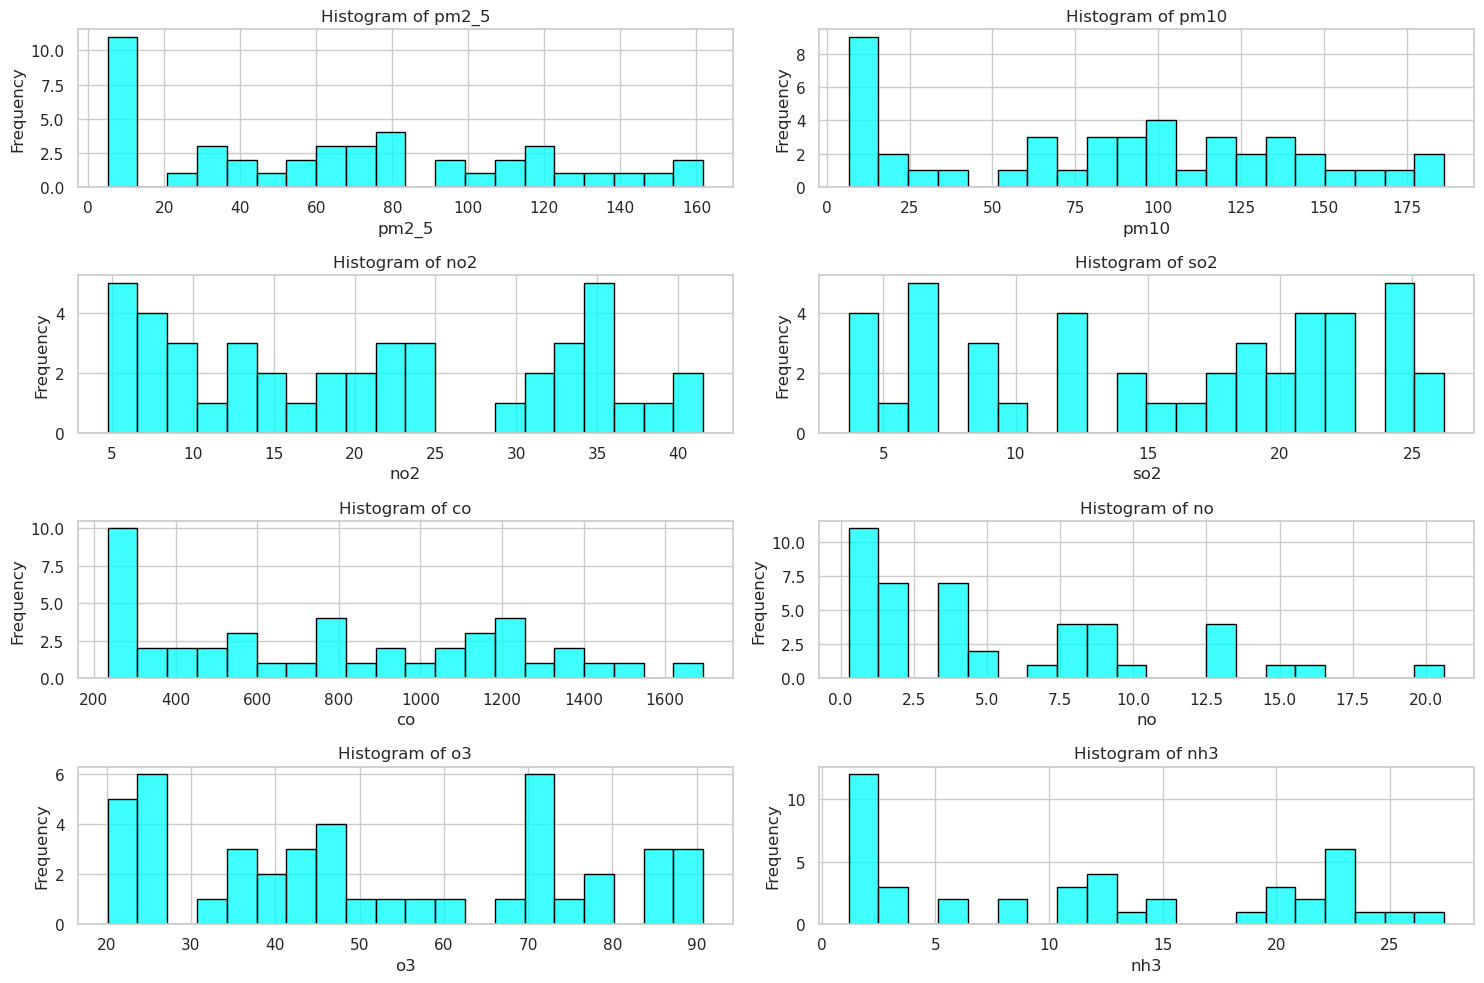

In [53]:
plt.figure(figsize=(15, 10))

# Loop through each pollutant column
for i, col in enumerate(monthly_data.columns):
    plt.subplot(len(monthly_data.columns)//2, 2, i+1)
    sns.histplot(monthly_data[col], bins=20, kde=False, edgecolor='black', color='cyan')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

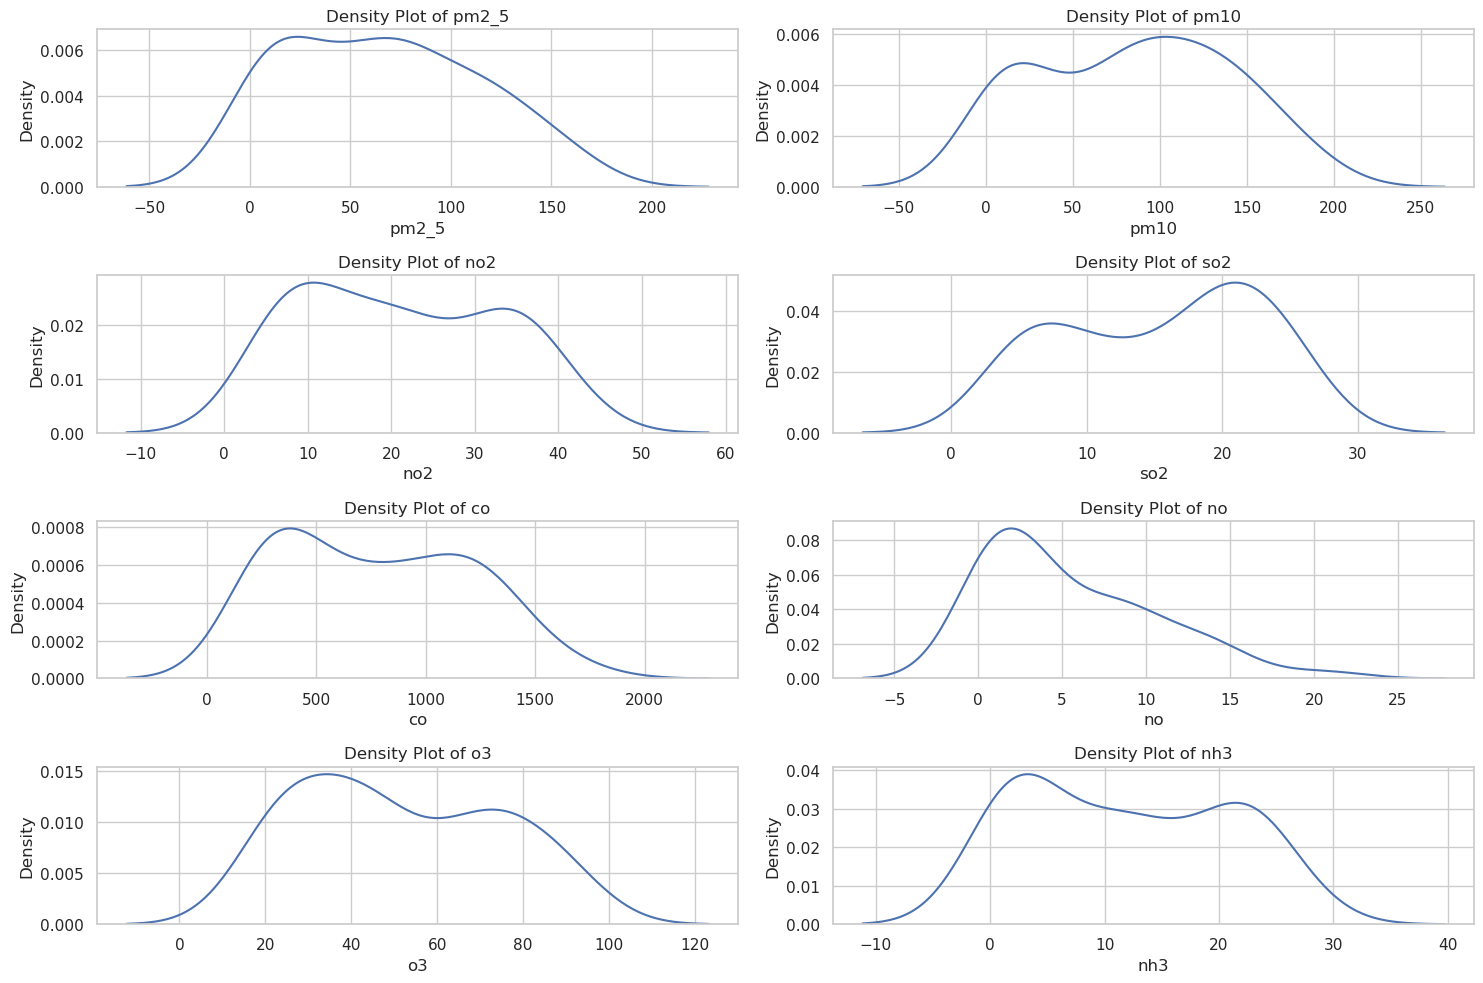

In [54]:
plt.figure(figsize=(15, 10))

# Loop through each pollutant column
for i, col in enumerate(monthly_data.columns):
    plt.subplot(len(monthly_data.columns)//2, 2, i+1)
    sns.kdeplot(data=monthly_data[col])
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

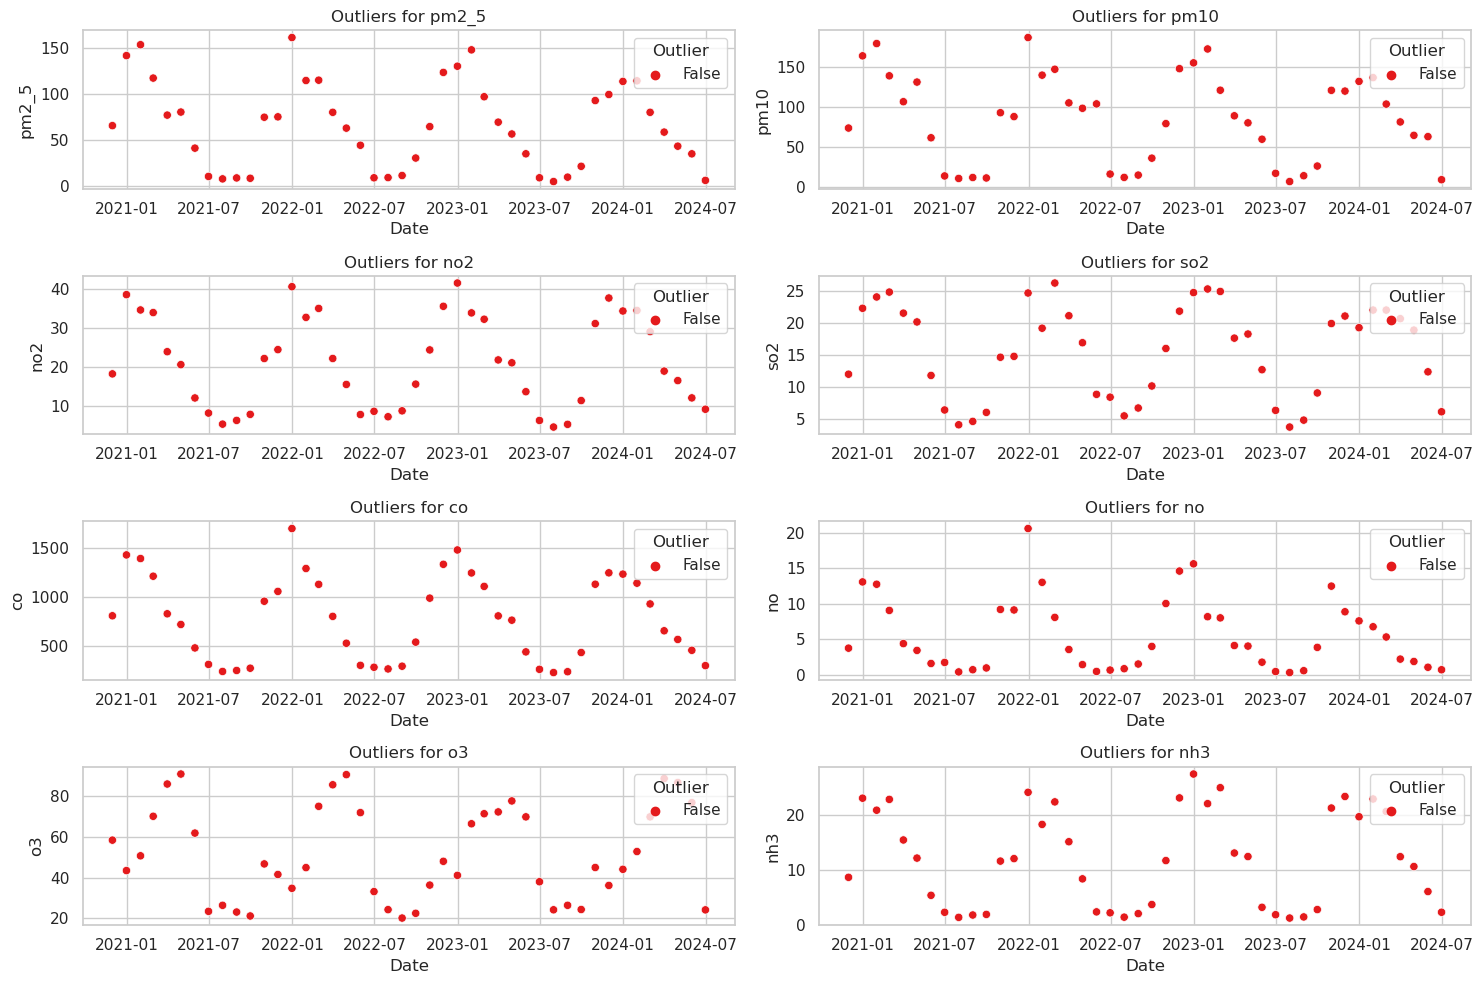

In [55]:
z_scores = (monthly_data - monthly_data.mean()) / monthly_data.std()

threshold = 3 #Generally threshold 3 is enough to find extreme outliers in normal

# createing a boolean df indicating outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

plt.figure(figsize=(15, 10))
for i, col in enumerate(monthly_data.columns):
    plt.subplot(len(monthly_data.columns)//2, 2, i+1)
    sns.scatterplot(x=monthly_data.index, y=monthly_data[col], hue=outliers[col], palette='Set1', legend='full')
    plt.title(f'Outliers for {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend(title='Outlier', loc='upper right')
    plt.tight_layout()

plt.show()

Calculating AQI (Air Quality Index) and AQI Bucket using standard Indian CPCB (Central Pollution Control Board) norms.

In [56]:
df.head(20)

pm2_5    pm10    no2    so2       co    no      o3  \
datetime                                                                   
2020-11-27 00:30:00   83.16   92.36  16.79   7.87   594.14  0.00   70.10   
2020-11-27 01:30:00   90.66   99.77  14.91   7.63   594.14  0.00   67.23   
2020-11-27 02:30:00   97.52  106.75  13.37   7.75   607.49  0.00   62.94   
2020-11-27 03:30:00  101.66  111.12  12.51   7.75   614.17  0.00   57.22   
2020-11-27 04:30:00  103.59  113.04  12.51   7.51   627.52  0.00   52.21   
2020-11-27 05:30:00  105.50  115.07  14.57   7.75   660.90  0.00   45.78   
2020-11-27 06:30:00  109.98  120.72  21.94   9.54   774.38  0.02   37.55   
2020-11-27 07:30:00  120.74  134.52  38.04  13.47  1014.71  0.28   25.03   
2020-11-27 08:30:00  127.73  141.48  40.78  16.21  1028.06  1.90   34.69   
2020-11-27 09:30:00  123.79  133.64  22.96  17.41   767.71  2.40   72.24   
2020-11-27 10:30:00  109.72  116.92  13.02  15.74   614.17  2.29   89.41   
2020-11-27 11:30:00   94.53   99.93   7.97  13.47   507.36  1.50  101.57   
2020-11-27 12:30:00   50.01   52.65   3.43   6.91   353.81  0.71   85.83   
2020-11-27 13:30:00   30.66   32.37   2.72   4.77   307.08  0.60   73.67   
2020-11-27 14:30:00   24.93   26.29   2.55   3.87   300.41  0.50   72.24   
2020-11-27 15:30:00   24.20   25.60   3.51   4.47   310.42  0.59   71.53   
2020-11-27 16:30:00   25.37   27.11   5.57   5.36   333.79  0.65   71.53   
2020-11-27 17:30:00   28.54   30.68   8.23   5.84   363.83  0.29   71.53   
2020-11-27 18:30:00   35.25   38.01   9.68   6.50   393.87  0.00   73.67   
2020-11-27 19:30:00   47.46   51.30  10.63   7.75   440.60  0.00   77.25   

                       nh3  
datetime                    
2020-11-27 00:30:00  14.06  
2020-11-27 01:30:00  14.31  
2020-11-27 02:30:00  12.79  
2020-11-27 03:30:00  11.40  
2020-11-27 04:30:00  10.13  
2020-11-27 05:30:00   9.12  
2020-11-27 06:30:00  10.51  
2020-11-27 07:30:00  15.45  
2020-11-27 08:30:00  16.09  
2020-11-27 09:30:00  11.15  
2020-11-27 10:30:00   8.87  
2020-11-27 11:30:00   7.66  
2020-11-27 12:30:00   4.43  
2020-11-27 13:30:00   3.29  
2020-11-27 14:30:00   2.95  
2020-11-27 15:30:00   3.10  
2020-11-27 16:30:00   3.71  
2020-11-27 17:30:00   4.18  
2020-11-27 18:30:00   4.62  
2020-11-27 19:30:00   5.32

In [57]:
df.reset_index(inplace=True)

In [58]:
df.drop(columns=['no'], inplace=True) #According to CPCB NO is not used to calculate AQI

In [59]:
df

datetime   pm2_5    pm10    no2   so2      co     o3    nh3
0     2020-11-27 00:30:00   83.16   92.36  16.79  7.87  594.14  70.10  14.06
1     2020-11-27 01:30:00   90.66   99.77  14.91  7.63  594.14  67.23  14.31
2     2020-11-27 02:30:00   97.52  106.75  13.37  7.75  607.49  62.94  12.79
3     2020-11-27 03:30:00  101.66  111.12  12.51  7.75  614.17  57.22  11.40
4     2020-11-27 04:30:00  103.59  113.04  12.51  7.51  627.52  52.21  10.13
...                   ...     ...     ...    ...   ...     ...    ...    ...
31093 2024-06-30 13:30:00    1.62    2.22   3.13  3.76  230.31  35.76   0.98
31094 2024-06-30 14:30:00    1.60    2.23   3.60  3.70  233.65  33.62   1.01
31095 2024-06-30 15:30:00    1.61    2.34   3.94  3.52  233.65  31.11   1.06
31096 2024-06-30 16:30:00    1.84    2.72   4.54  3.43  236.99  29.68   1.12
31097 2024-06-30 17:30:00    2.19    3.23   5.57  3.46  240.33  27.90   1.17

[31098 rows x 8 columns]

In [60]:
df["PM2.5_24hr_avg"] = df["pm2_5"].rolling(window = 24, min_periods = 16).mean().values
df["PM10_24hr_avg"] = df["pm10"].rolling(window = 24, min_periods = 16).mean().values
df["NO2_24hr_avg"] = df["no2"].rolling(window = 24, min_periods = 16).mean().values
df["SO2_24hr_avg"] = df["so2"].rolling(window = 24, min_periods = 16).mean().values
df["CO_8hr_max"] = df["co"].rolling(window = 8, min_periods = 1).max().values
df["O3_8hr_max"] = df["o3"].rolling(window = 8, min_periods = 1).max().values
df["NH3_24hr_avg"] = df["nh3"].rolling(window = 24, min_periods = 16).mean().values

In [61]:
df.head(30)

datetime   pm2_5    pm10    no2    so2       co      o3    nh3  \
0  2020-11-27 00:30:00   83.16   92.36  16.79   7.87   594.14   70.10  14.06   
1  2020-11-27 01:30:00   90.66   99.77  14.91   7.63   594.14   67.23  14.31   
2  2020-11-27 02:30:00   97.52  106.75  13.37   7.75   607.49   62.94  12.79   
3  2020-11-27 03:30:00  101.66  111.12  12.51   7.75   614.17   57.22  11.40   
4  2020-11-27 04:30:00  103.59  113.04  12.51   7.51   627.52   52.21  10.13   
5  2020-11-27 05:30:00  105.50  115.07  14.57   7.75   660.90   45.78   9.12   
6  2020-11-27 06:30:00  109.98  120.72  21.94   9.54   774.38   37.55  10.51   
7  2020-11-27 07:30:00  120.74  134.52  38.04  13.47  1014.71   25.03  15.45   
8  2020-11-27 08:30:00  127.73  141.48  40.78  16.21  1028.06   34.69  16.09   
9  2020-11-27 09:30:00  123.79  133.64  22.96  17.41   767.71   72.24  11.15   
10 2020-11-27 10:30:00  109.72  116.92  13.02  15.74   614.17   89.41   8.87   
11 2020-11-27 11:30:00   94.53   99.93   7.97  13.47   507.36  101.57   7.66   
12 2020-11-27 12:30:00   50.01   52.65   3.43   6.91   353.81   85.83   4.43   
13 2020-11-27 13:30:00   30.66   32.37   2.72   4.77   307.08   73.67   3.29   
14 2020-11-27 14:30:00   24.93   26.29   2.55   3.87   300.41   72.24   2.95   
15 2020-11-27 15:30:00   24.20   25.60   3.51   4.47   310.42   71.53   3.10   
16 2020-11-27 16:30:00   25.37   27.11   5.57   5.36   333.79   71.53   3.71   
17 2020-11-27 17:30:00   28.54   30.68   8.23   5.84   363.83   71.53   4.18   
18 2020-11-27 18:30:00   35.25   38.01   9.68   6.50   393.87   73.67   4.62   
19 2020-11-27 19:30:00   47.46   51.30  10.63   7.75   440.60   77.25   5.32   
20 2020-11-27 20:30:00   60.91   65.70  10.54   8.70   473.98   82.97   5.70   
21 2020-11-27 21:30:00   73.90   79.04   9.85   9.18   480.65   87.26   5.57   
22 2020-11-27 22:30:00   86.68   91.68   8.57   9.18   460.63   88.69   4.62   
23 2020-11-27 23:30:00   94.67   98.63   7.11   9.06   423.91   88.69   3.20   
24 2020-11-28 00:30:00   90.97   93.62   5.10   7.99   383.85   87.26   1.84   
25 2020-11-28 01:30:00   88.79   91.25   4.03   7.27   367.17   85.83   1.58   
26 2020-11-28 02:30:00   92.22   95.01   3.77   7.75   370.50   86.55   1.62   
27 2020-11-28 03:30:00   92.21   94.75   3.86   8.23   373.84   85.12   2.01   
28 2020-11-28 04:30:00   87.13   89.16   4.16   8.35   377.18   80.11   2.53   
29 2020-11-28 05:30:00   81.27   82.97   4.71   8.35   380.52   74.39   2.76   

    PM2.5_24hr_avg  PM10_24hr_avg  NO2_24hr_avg  SO2_24hr_avg  CO_8hr_max  \
0              NaN            NaN           NaN           NaN      594.14   
1              NaN            NaN           NaN           NaN      594.14   
2              NaN            NaN           NaN           NaN      607.49   
3              NaN            NaN           NaN           NaN      614.17   
4              NaN            NaN           NaN           NaN      627.52   
5              NaN            NaN           NaN           NaN      660.90   
6              NaN            NaN           NaN           NaN      774.38   
7              NaN            NaN           NaN           NaN     1014.71   
8              NaN            NaN           NaN           NaN     1028.06   
9              NaN            NaN           NaN           NaN     1028.06   
10             NaN            NaN           NaN           NaN     1028.06   
11             NaN            NaN           NaN           NaN     1028.06   
12             NaN            NaN           NaN           NaN     1028.06   
13             NaN            NaN           NaN           NaN     1028.06   
14             NaN            NaN           NaN           NaN     1028.06   
15       87.398750      95.139375     15.098750      9.507500     1028.06   
16       83.750000      91.137647     14.538235      9.263529      767.71   
17       80.682778      87.778889     14.187778      9.073333      614.17   
18       78.291579      85.159474     13.950526      8.937895      507

In [62]:
df.fillna(0, inplace=True)

In [63]:
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

In [64]:
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

In [65]:
def get_NO2_subindex_ugm3(x):
    if x <= 75.2:  # 40 ppb * 1.88 = 75.2 µg/m³
        return x * 50 / 75.2
    elif x <= 150.4:  # 80 ppb * 1.88 = 150.4 µg/m³
        return 50 + (x - 75.2) * 50 / 75.2
    elif x <= 338.4:  # 180 ppb * 1.88 = 338.4 µg/m³
        return 100 + (x - 150.4) * 100 / 188
    elif x <= 526.4:  # 280 ppb * 1.88 = 526.4 µg/m³
        return 200 + (x - 338.4) * 100 / 188
    elif x <= 752:  # 400 ppb * 1.88 = 752 µg/m³
        return 300 + (x - 526.4) * 100 / 225.6
    elif x > 752:
        return 400 + (x - 752) * 100 / 225.6
    else:
        return 0

df["NO2_SubIndex"] = df["NO2_24hr_avg"].apply(lambda x: get_NO2_subindex_ugm3(x))


In [66]:
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

In [67]:
def get_CO_subindex(x):
    x = x * 0.001 #Convert ug/m3 to mg/m3
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

In [68]:
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

In [69]:
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

In [70]:
df.head()

datetime   pm2_5    pm10    no2   so2      co     o3    nh3  \
0 2020-11-27 00:30:00   83.16   92.36  16.79  7.87  594.14  70.10  14.06   
1 2020-11-27 01:30:00   90.66   99.77  14.91  7.63  594.14  67.23  14.31   
2 2020-11-27 02:30:00   97.52  106.75  13.37  7.75  607.49  62.94  12.79   
3 2020-11-27 03:30:00  101.66  111.12  12.51  7.75  614.17  57.22  11.40   
4 2020-11-27 04:30:00  103.59  113.04  12.51  7.51  627.52  52.21  10.13   

   PM2.5_24hr_avg  PM10_24hr_avg  ...  CO_8hr_max  O3_8hr_max  NH3_24hr_avg  \
0             0.0            0.0  ...      594.14        70.1           0.0   
1             0.0            0.0  ...      594.14        70.1           0.0   
2             0.0            0.0  ...      607.49        70.1           0.0   
3             0.0            0.0  ...      614.17        70.1           0.0   
4             0.0            0.0  ...      627.52        70.1           0.0   

   PM2.5_SubIndex  PM10_SubIndex  NO2_SubIndex  SO2_SubIndex  CO_SubIndex  \
0             0.0            0.0           0.0           0.0      29.7070   
1             0.0            0.0           0.0           0.0      29.7070   
2             0.0            0.0           0.0           0.0      30.3745   
3             0.0            0.0           0.0           0.0      30.7085   
4             0.0            0.0           0.0           0.0      31.3760   

   O3_SubIndex  NH3_SubIndex  
0         70.1           0.0  
1         70.1           0.0  
2         70.1           0.0  
3         70.1           0.0  
4         70.1           0.0  

[5 rows x 22 columns]

In [71]:
df.describe()

pm2_5          pm10           no2           so2            co  \
count  31098.000000  31098.000000  31098.000000  31098.000000  31098.000000   
mean      66.367196     84.848779     21.113343     15.523306    773.963276   
std       67.827088     80.664483     20.854051     13.101570    688.323526   
min        0.950000      1.590000      0.770000      0.980000    170.230000   
25%       10.320000     15.012500      5.830000      6.200000    280.380000   
50%       48.275000     67.320000     13.880000     11.920000    514.030000   
75%       97.115000    123.317500     30.160000     20.740000   1014.710000   
max      670.220000    727.740000    260.470000    146.870000   5928.040000   

                 o3           nh3  PM2.5_24hr_avg  PM10_24hr_avg  \
count  31098.000000  31098.000000    31098.000000   31098.000000   
mean      51.343032     11.826720       66.354203      84.834250   
std       52.861020     16.593936       57.697280      67.997873   
min        0.000000      0.000000        0.000000       0.000000   
25%       14.130000      1.810000       10.603125      16.132188   
50%       29.680000      4.940000       57.659167      79.803333   
75%       77.250000     15.450000      100.022708     125.873125   
max      360.490000    170.230000      339.747500     379.499583   

       NO2_24hr_avg  ...    CO_8hr_max    O3_8hr_max  NH3_24hr_avg  \
count  31098.000000  ...  31098.000000  31098.000000  31098.000000   
mean      21.109131  ...   1149.494080     84.738320     11.824727   
std       14.506539  ...    953.098162     65.755229     11.520099   
min        0.000000  ...    190.260000      0.000000      0.000000   
25%        8.158542  ...    337.120000     28.970000      1.997500   
50%       18.836250  ...    821.110000     64.370000      8.471042   
75%       30.516458  ...   1708.980000    137.330000     17.969896   
max       93.318333  ...   5928.040000    360.490000     69.420417   

       PM2.5_SubIndex  PM10_SubIndex  NO2_SubIndex  SO2_SubIndex  \
count    31098.000000   31098.000000  31098.000000  31098.000000   
mean       134.443440      78.187701     14.035326     19.400615   
std        119.116942      57.669408      9.645305     11.852887   
min          0.000000       0.000000      0.000000      0.000000   
25%         17.671875      16.132188      5.424562      8.539974   
50%         96.098611      79.803333     12.524102     18.919531   
75%        233.409028     117.248750     20.290198     26.543099   
max        469.036538     336.874479     62.046764     70.866667   

        CO_SubIndex   O3_SubIndex  NH3_SubIndex  
count  31098.000000  31098.000000  31098.000000  
mean      52.065855     96.676908      2.956182  
std       36.735471     84.360378      2.880025  
min        9.513000      0.000000      0.000000  
25%       16.856000     28.970000      0.499375  
50%       41.055500     64.370000      2.117760  
75%       85.449000    154.897059      4.492474  
max      149.100500    328.291280     17.355104  

[8 rows x 21 columns]

In [72]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                (df["PM10_SubIndex"] > 0).astype(int) + \
                (df["NO2_SubIndex"] > 0).astype(int) + \
                (df["SO2_SubIndex"] > 0).astype(int) + \
                (df["CO_SubIndex"] > 0).astype(int) + \
                (df["O3_SubIndex"] > 0).astype(int) + \
                (df["NH3_SubIndex"] > 0).astype(int)

df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "NO2_SubIndex", "SO2_SubIndex",
                                 "CO_SubIndex", "O3_SubIndex", "NH3_SubIndex"]].max(axis = 1))

df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df[~df.AQI_calculated.isna()].head(13)

datetime  pm2_5   pm10    no2   so2      co     o3   nh3  \
15 2020-11-27 15:30:00  24.20  25.60   3.51  4.47  310.42  71.53  3.10   
16 2020-11-27 16:30:00  25.37  27.11   5.57  5.36  333.79  71.53  3.71   
17 2020-11-27 17:30:00  28.54  30.68   8.23  5.84  363.83  71.53  4.18   
18 2020-11-27 18:30:00  35.25  38.01   9.68  6.50  393.87  73.67  4.62   
19 2020-11-27 19:30:00  47.46  51.30  10.63  7.75  440.60  77.25  5.32   
20 2020-11-27 20:30:00  60.91  65.70  10.54  8.70  473.98  82.97  5.70   
21 2020-11-27 21:30:00  73.90  79.04   9.85  9.18  480.65  87.26  5.57   
22 2020-11-27 22:30:00  86.68  91.68   8.57  9.18  460.63  88.69  4.62   
23 2020-11-27 23:30:00  94.67  98.63   7.11  9.06  423.91  88.69  3.20   
24 2020-11-28 00:30:00  90.97  93.62   5.10  7.99  383.85  87.26  1.84   
25 2020-11-28 01:30:00  88.79  91.25   4.03  7.27  367.17  85.83  1.58   
26 2020-11-28 02:30:00  92.22  95.01   3.77  7.75  370.50  86.55  1.62   
27 2020-11-28 03:30:00  92.21  94.75   3.86  8.23  373.84  85.12  2.01   

    PM2.5_24hr_avg  PM10_24hr_avg  ...  PM2.5_SubIndex  PM10_SubIndex  \
15       87.398750      95.139375  ...      191.329167      95.139375   
16       83.750000      91.137647  ...      179.166667      91.137647   
17       80.682778      87.778889  ...      168.942593      87.778889   
18       78.291579      85.159474  ...      160.971930      85.159474   
19       76.750000      83.466500  ...      155.833333      83.466500   
20       75.995714      82.620476  ...      153.319048      82.620476   
21       75.900455      82.457727  ...      153.001515      82.457727   
22       76.369130      82.858696  ...      154.563768      82.858696   
23       77.131667      83.515833  ...      157.105556      83.515833   
24       77.457083      83.568333  ...      158.190278      83.568333   
25       77.379167      83.213333  ...      157.930556      83.213333   
26       77.158333      82.724167  ...      157.194444      82.724167   
27       76.764583      82.042083  ...      155.881944      82.042083   

    NO2_SubIndex  SO2_SubIndex  CO_SubIndex  O3_SubIndex  NH3_SubIndex  \
15     10.039062     11.884375      51.4030   102.308824      2.426719   
16      9.666380     11.579412      38.3855   102.308824      2.338529   
17      9.433363     11.341667      30.7085   102.308824      2.266667   
18      9.275616     11.172368      25.3680   102.308824      2.208158   
19      9.165226     11.098125      22.0300    85.830000      2.164250   
20      9.062500     11.087500      23.6990    82.970000      2.129048   
21      8.948259     11.105114      24.0325    87.260000      2.095568   
22      8.806950     11.121196      24.0325    88.690000      2.054674   
23      8.636968     11.129687      24.0325    88.690000      2.002396   
24      8.313109     11.135938      24.0325    88.690000      1.875104   
25      8.011691     11.117187      24.0325    88.690000      1.742500   
26      7.745734     11.117187      24.0325    88.690000      1.626146   
27      7.506095     11.142188      24.0325    88.690000      1.528333   

    Checks  AQI_calculated  AQI_bucket_calculated  
15       7           191.0               Moderate  
16       7           179.0               Moderate  
17       7           169.0               Moderate  
18       7           161.0               Moderate  
19       7           156.0               Moderate  
20       7           153.0               Moderate  
21       7           153.0               Moderate  
22       7           155.0               Moderate  
23       7           157.0               Moderate  
24       7           158.0               Moderate  
25       7           158.0               Moderate  
26       7           157.0               Moderate  
27       7           156.0               Moderate  

[13 rows x 25 columns]

In [73]:
df[~df.AQI_calculated.isna()].shape

(31083, 25)

In [74]:
df[~df.AQI_calculated.isna()].AQI_bucket_calculated.value_counts()

Good            8431
Moderate        7346
Very Poor       5704
Poor            5526
Satisfactory    3795
Severe           281
Name: AQI_bucket_calculated, dtype: int64

In [75]:
df.head(30)

datetime   pm2_5    pm10    no2    so2       co      o3    nh3  \
0  2020-11-27 00:30:00   83.16   92.36  16.79   7.87   594.14   70.10  14.06   
1  2020-11-27 01:30:00   90.66   99.77  14.91   7.63   594.14   67.23  14.31   
2  2020-11-27 02:30:00   97.52  106.75  13.37   7.75   607.49   62.94  12.79   
3  2020-11-27 03:30:00  101.66  111.12  12.51   7.75   614.17   57.22  11.40   
4  2020-11-27 04:30:00  103.59  113.04  12.51   7.51   627.52   52.21  10.13   
5  2020-11-27 05:30:00  105.50  115.07  14.57   7.75   660.90   45.78   9.12   
6  2020-11-27 06:30:00  109.98  120.72  21.94   9.54   774.38   37.55  10.51   
7  2020-11-27 07:30:00  120.74  134.52  38.04  13.47  1014.71   25.03  15.45   
8  2020-11-27 08:30:00  127.73  141.48  40.78  16.21  1028.06   34.69  16.09   
9  2020-11-27 09:30:00  123.79  133.64  22.96  17.41   767.71   72.24  11.15   
10 2020-11-27 10:30:00  109.72  116.92  13.02  15.74   614.17   89.41   8.87   
11 2020-11-27 11:30:00   94.53   99.93   7.97  13.47   507.36  101.57   7.66   
12 2020-11-27 12:30:00   50.01   52.65   3.43   6.91   353.81   85.83   4.43   
13 2020-11-27 13:30:00   30.66   32.37   2.72   4.77   307.08   73.67   3.29   
14 2020-11-27 14:30:00   24.93   26.29   2.55   3.87   300.41   72.24   2.95   
15 2020-11-27 15:30:00   24.20   25.60   3.51   4.47   310.42   71.53   3.10   
16 2020-11-27 16:30:00   25.37   27.11   5.57   5.36   333.79   71.53   3.71   
17 2020-11-27 17:30:00   28.54   30.68   8.23   5.84   363.83   71.53   4.18   
18 2020-11-27 18:30:00   35.25   38.01   9.68   6.50   393.87   73.67   4.62   
19 2020-11-27 19:30:00   47.46   51.30  10.63   7.75   440.60   77.25   5.32   
20 2020-11-27 20:30:00   60.91   65.70  10.54   8.70   473.98   82.97   5.70   
21 2020-11-27 21:30:00   73.90   79.04   9.85   9.18   480.65   87.26   5.57   
22 2020-11-27 22:30:00   86.68   91.68   8.57   9.18   460.63   88.69   4.62   
23 2020-11-27 23:30:00   94.67   98.63   7.11   9.06   423.91   88.69   3.20   
24 2020-11-28 00:30:00   90.97   93.62   5.10   7.99   383.85   87.26   1.84   
25 2020-11-28 01:30:00   88.79   91.25   4.03   7.27   367.17   85.83   1.58   
26 2020-11-28 02:30:00   92.22   95.01   3.77   7.75   370.50   86.55   1.62   
27 2020-11-28 03:30:00   92.21   94.75   3.86   8.23   373.84   85.12   2.01   
28 2020-11-28 04:30:00   87.13   89.16   4.16   8.35   377.18   80.11   2.53   
29 2020-11-28 05:30:00   81.27   82.97   4.71   8.35   380.52   74.39   2.76   

    PM2.5_24hr_avg  PM10_24hr_avg  ...  PM2.5_SubIndex  PM10_SubIndex  \
0         0.000000       0.000000  ...        0.000000       0.000000   
1         0.000000       0.000000  ...        0.000000       0.000000   
2         0.000000       0.000000  ...        0.000000       0.000000   
3         0.000000       0.000000  ...        0.000000       0.000000   
4         0.000000       0.000000  ...        0.000000       0.000000   
5         0.000000       0.000000  ...        0.000000       0.000000   
6         0.000000       0.000000  ...        0.000000       0.000000   
7         0.000000       0.000000  ...        0.000000       0.000000   
8         0.000000       0.000000  ...        0.000000       0.000000   
9         0.000000       0.000000  ...        0.000000       0.000000   
10        0.000000       0.000000  ...        0.000000       0.000000   
11        0.000000       0.000000  ...        0.000000       0.000000   
12        0.000000       0.000000  ...        0.000000       0.000000   
13        0.000000       0.000000  ...        0.000000       0.000000   
14        0.000000       0.000000  ...        0.000000       0.000000   
15       87.398750      95.139375  ...      191.329167      95.139375   
16       83.750000      91.137647  ...      179.166667      91.137647   
17       80.682778      87.778889  ...      168.942593      87.778889   
18       78.291579      85.159474  ...      160.971930      85.159474   
19       76.750000      83.466500  ...      155.833333      83.466500   


In [76]:
df.columns

Index(['datetime', 'pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'nh3',
       'PM2.5_24hr_avg', 'PM10_24hr_avg', 'NO2_24hr_avg', 'SO2_24hr_avg',
       'CO_8hr_max', 'O3_8hr_max', 'NH3_24hr_avg', 'PM2.5_SubIndex',
       'PM10_SubIndex', 'NO2_SubIndex', 'SO2_SubIndex', 'CO_SubIndex',
       'O3_SubIndex', 'NH3_SubIndex', 'Checks', 'AQI_calculated',
       'AQI_bucket_calculated'],
      dtype='object')

In [77]:
df.rename(columns={'AQI_calculated': 'AQI', 'AQI_bucket_calculated': 'AQI_bucket'}, inplace=True)

In [78]:
df.dropna(inplace=True)

In [79]:
basic_val_columns = ['datetime', 'pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'nh3', 'AQI', 'AQI_bucket']
subindex_columns = ['datetime', 'PM2.5_SubIndex', 'PM10_SubIndex', 'NO2_SubIndex', 'SO2_SubIndex', 'CO_SubIndex', 'O3_SubIndex', 'NH3_SubIndex', 'AQI', 'AQI_bucket']

basic_val_df = df[basic_val_columns]
subindex_df = df[subindex_columns]

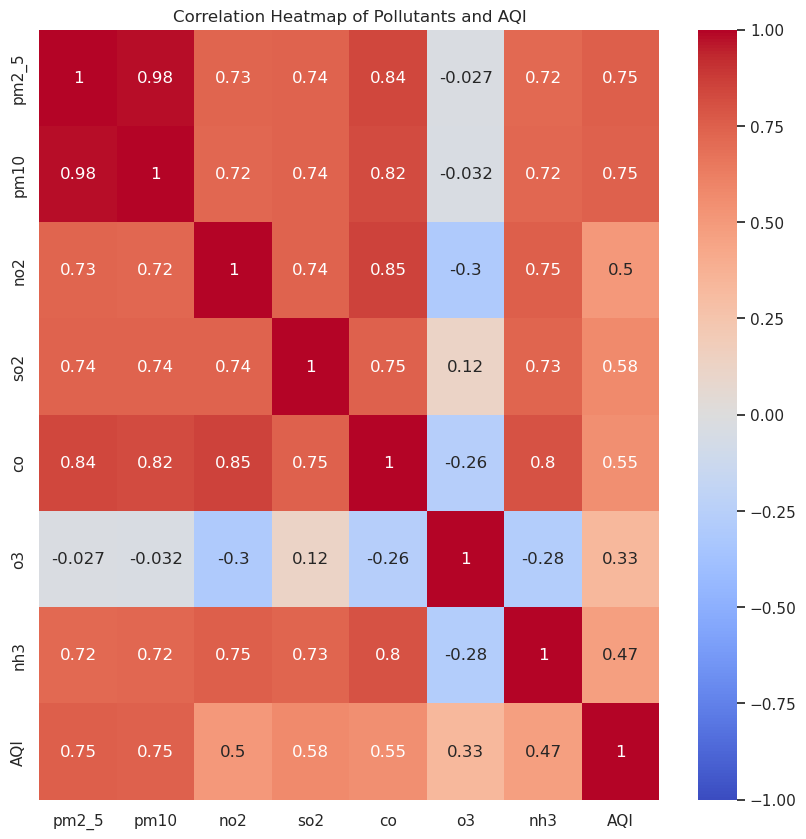

In [80]:
pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'nh3']
correlation_df = basic_val_df[pollutants + ['AQI']]

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Pollutants and AQI')
plt.show()

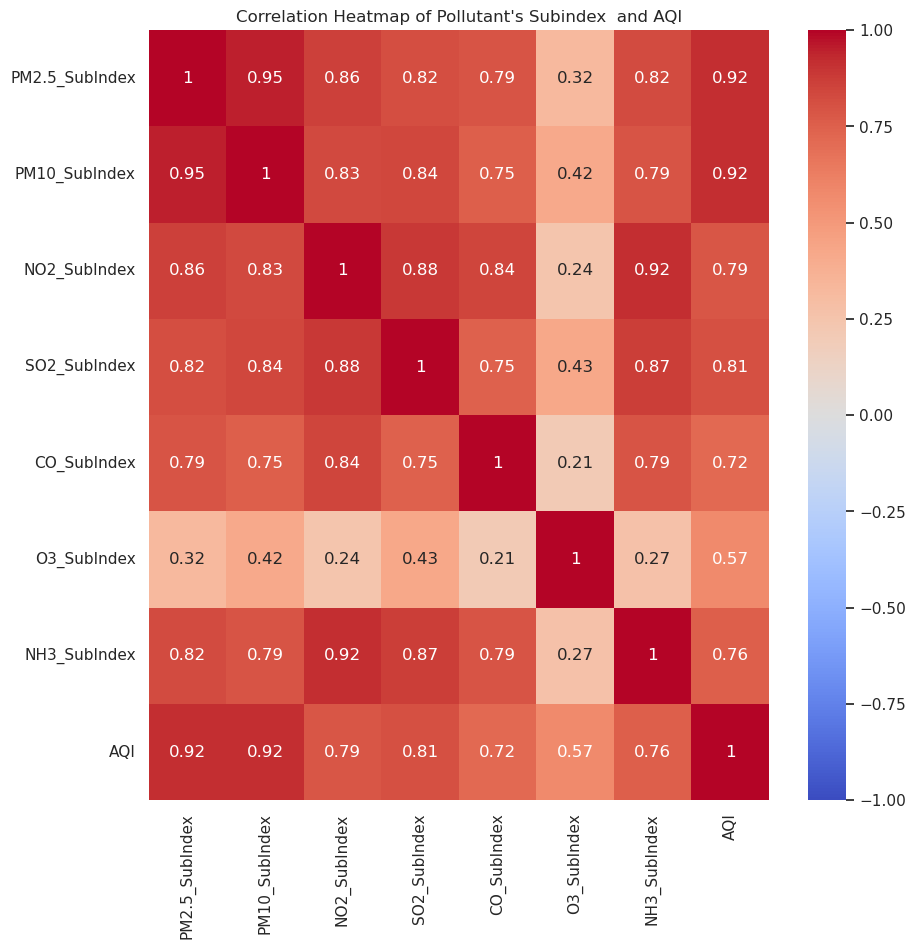

In [81]:
pollutants = ['PM2.5_SubIndex', 'PM10_SubIndex', 'NO2_SubIndex', 'SO2_SubIndex', 'CO_SubIndex', 'O3_SubIndex', 'NH3_SubIndex']
correlation_df = subindex_df[pollutants + ['AQI']]

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Pollutant\'s Subindex  and AQI')
plt.show()

In [82]:
basic_val_df.head()

datetime  pm2_5   pm10    no2   so2      co     o3   nh3    AQI  \
15 2020-11-27 15:30:00  24.20  25.60   3.51  4.47  310.42  71.53  3.10  191.0   
16 2020-11-27 16:30:00  25.37  27.11   5.57  5.36  333.79  71.53  3.71  179.0   
17 2020-11-27 17:30:00  28.54  30.68   8.23  5.84  363.83  71.53  4.18  169.0   
18 2020-11-27 18:30:00  35.25  38.01   9.68  6.50  393.87  73.67  4.62  161.0   
19 2020-11-27 19:30:00  47.46  51.30  10.63  7.75  440.60  77.25  5.32  156.0   

   AQI_bucket  
15   Moderate  
16   Moderate  
17   Moderate  
18   Moderate  
19   Moderate

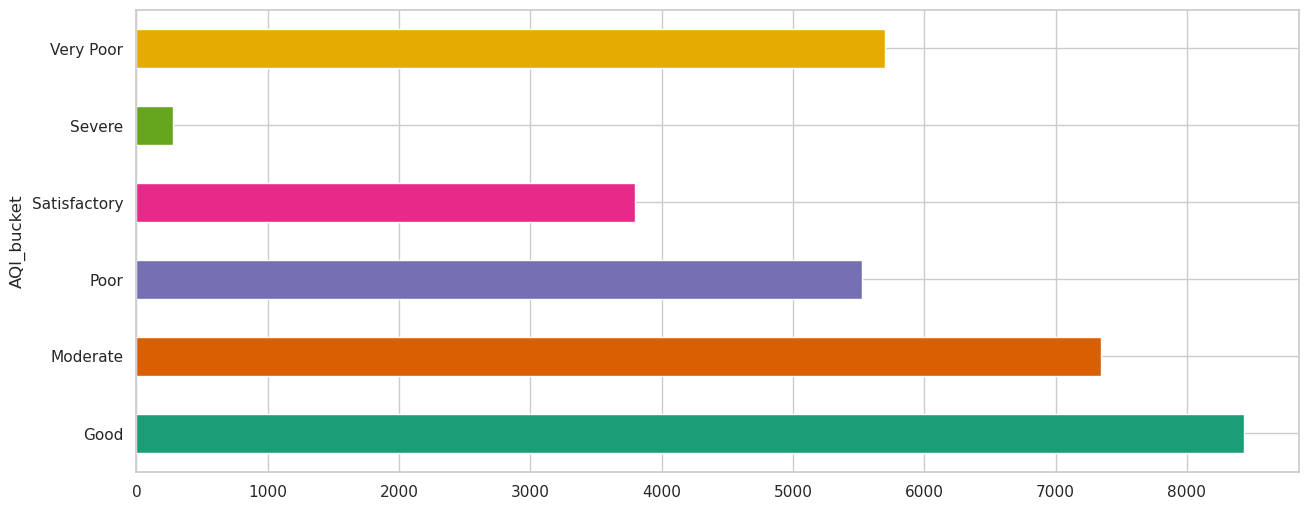

In [83]:
basic_val_df.groupby('AQI_bucket').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [85]:
features = ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'nh3']
target = 'AQI'

X = basic_val_df[features]
y = basic_val_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

print('Model Coefficients:')
for feature, coef in zip(features, model.coef_):
    print(f'{feature}: {coef}')

Mean Squared Error: 3650.192681920794
R-squared: 0.723414971401869
Model Coefficients:
pm2_5: 0.8153355575848438
pm10: 0.37108105360720955
no2: 1.5799786264268305
so2: -2.3456321895199874
co: -0.013757710779546739
o3: 1.0395455166551142
nh3: 0.7688395215724705


In [86]:
subindex_df.head()

datetime  PM2.5_SubIndex  PM10_SubIndex  NO2_SubIndex  \
15 2020-11-27 15:30:00      191.329167      95.139375     10.039062   
16 2020-11-27 16:30:00      179.166667      91.137647      9.666380   
17 2020-11-27 17:30:00      168.942593      87.778889      9.433363   
18 2020-11-27 18:30:00      160.971930      85.159474      9.275616   
19 2020-11-27 19:30:00      155.833333      83.466500      9.165226   

    SO2_SubIndex  CO_SubIndex  O3_SubIndex  NH3_SubIndex    AQI AQI_bucket  
15     11.884375      51.4030   102.308824      2.426719  191.0   Moderate  
16     11.579412      38.3855   102.308824      2.338529  179.0   Moderate  
17     11.341667      30.7085   102.308824      2.266667  169.0   Moderate  
18     11.172368      25.3680   102.308824      2.208158  161.0   Moderate  
19     11.098125      22.0300    85.830000      2.164250  156.0   Moderate

In [87]:
subindex_df.shape

(31083, 10)

In [88]:
subindex_df.describe()

PM2.5_SubIndex  PM10_SubIndex  NO2_SubIndex  SO2_SubIndex  \
count    31083.000000   31083.000000  31083.000000  31083.000000   
mean       134.508319      78.225432     14.042099     19.409978   
std        119.109052      57.657731      9.642701     11.848080   
min          2.979167       2.784167      1.166611      1.817187   
25%         17.785764      16.196667      5.431073      8.557031   
50%         96.138889      79.846250     12.527427     18.926042   
75%        233.469444     117.260278     20.293246     26.549219   
max        469.036538     336.874479     62.046764     70.866667   

        CO_SubIndex   O3_SubIndex  NH3_SubIndex           AQI  
count  31083.000000  31083.000000  31083.000000  31083.000000  
mean      52.070577     96.684991      2.957608    161.478590  
std       36.743064     84.379341      2.879987    114.069093  
min        9.513000      0.000000      0.171875     14.000000  
25%       16.856000     28.970000      0.499844     43.000000  
50%       41.055500     64.370000      2.119063    149.000000  
75%       85.449000    154.897059      4.493385    264.000000  
max      149.100500    328.291280     17.355104    469.000000

In [89]:
features = ['PM2.5_SubIndex', 'PM10_SubIndex', 'NO2_SubIndex', 'SO2_SubIndex', 'CO_SubIndex', 'O3_SubIndex', 'NH3_SubIndex']
target = 'AQI'

X = subindex_df[features]
y = subindex_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

print('Model Coefficients:')
for feature, coef in zip(features, model.coef_):
    print(f'{feature}: {coef}')

Mean Squared Error: 905.1841552893795
R-squared: 0.9314117343127366
Model Coefficients:
PM2.5_SubIndex: 0.648234889391764
PM10_SubIndex: 0.2966578910534495
NO2_SubIndex: 0.17171372451291053
SO2_SubIndex: 0.2649200404903548
CO_SubIndex: 0.0324034389065149
O3_SubIndex: 0.37880565556830126
NH3_SubIndex: -1.5802845558418201


In [90]:
X = subindex_df[features]
y = subindex_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

print('Feature Importances:')
for feature, importance in zip(features, model.feature_importances_):
    print(f'{feature}: {importance}')

Mean Squared Error: 0.2106489142673315
R-squared: 0.9999840385587683
Feature Importances:
PM2.5_SubIndex: 0.15209802105852993
PM10_SubIndex: 0.6473481249398362
NO2_SubIndex: 4.932338617041674e-06
SO2_SubIndex: 5.518621797104094e-06
CO_SubIndex: 0.0006424354707264853
O3_SubIndex: 0.19989549931689315
NH3_SubIndex: 5.468253599935976e-06


In [91]:
subindex_df.columns

Index(['datetime', 'PM2.5_SubIndex', 'PM10_SubIndex', 'NO2_SubIndex',
       'SO2_SubIndex', 'CO_SubIndex', 'O3_SubIndex', 'NH3_SubIndex', 'AQI',
       'AQI_bucket'],
      dtype='object')

In [92]:
df = subindex_df[['datetime', 'PM2.5_SubIndex', 'PM10_SubIndex', 'NO2_SubIndex','SO2_SubIndex', 'CO_SubIndex', 'O3_SubIndex', 'NH3_SubIndex', 'AQI']]

In [93]:
df.set_index('datetime', inplace=True)

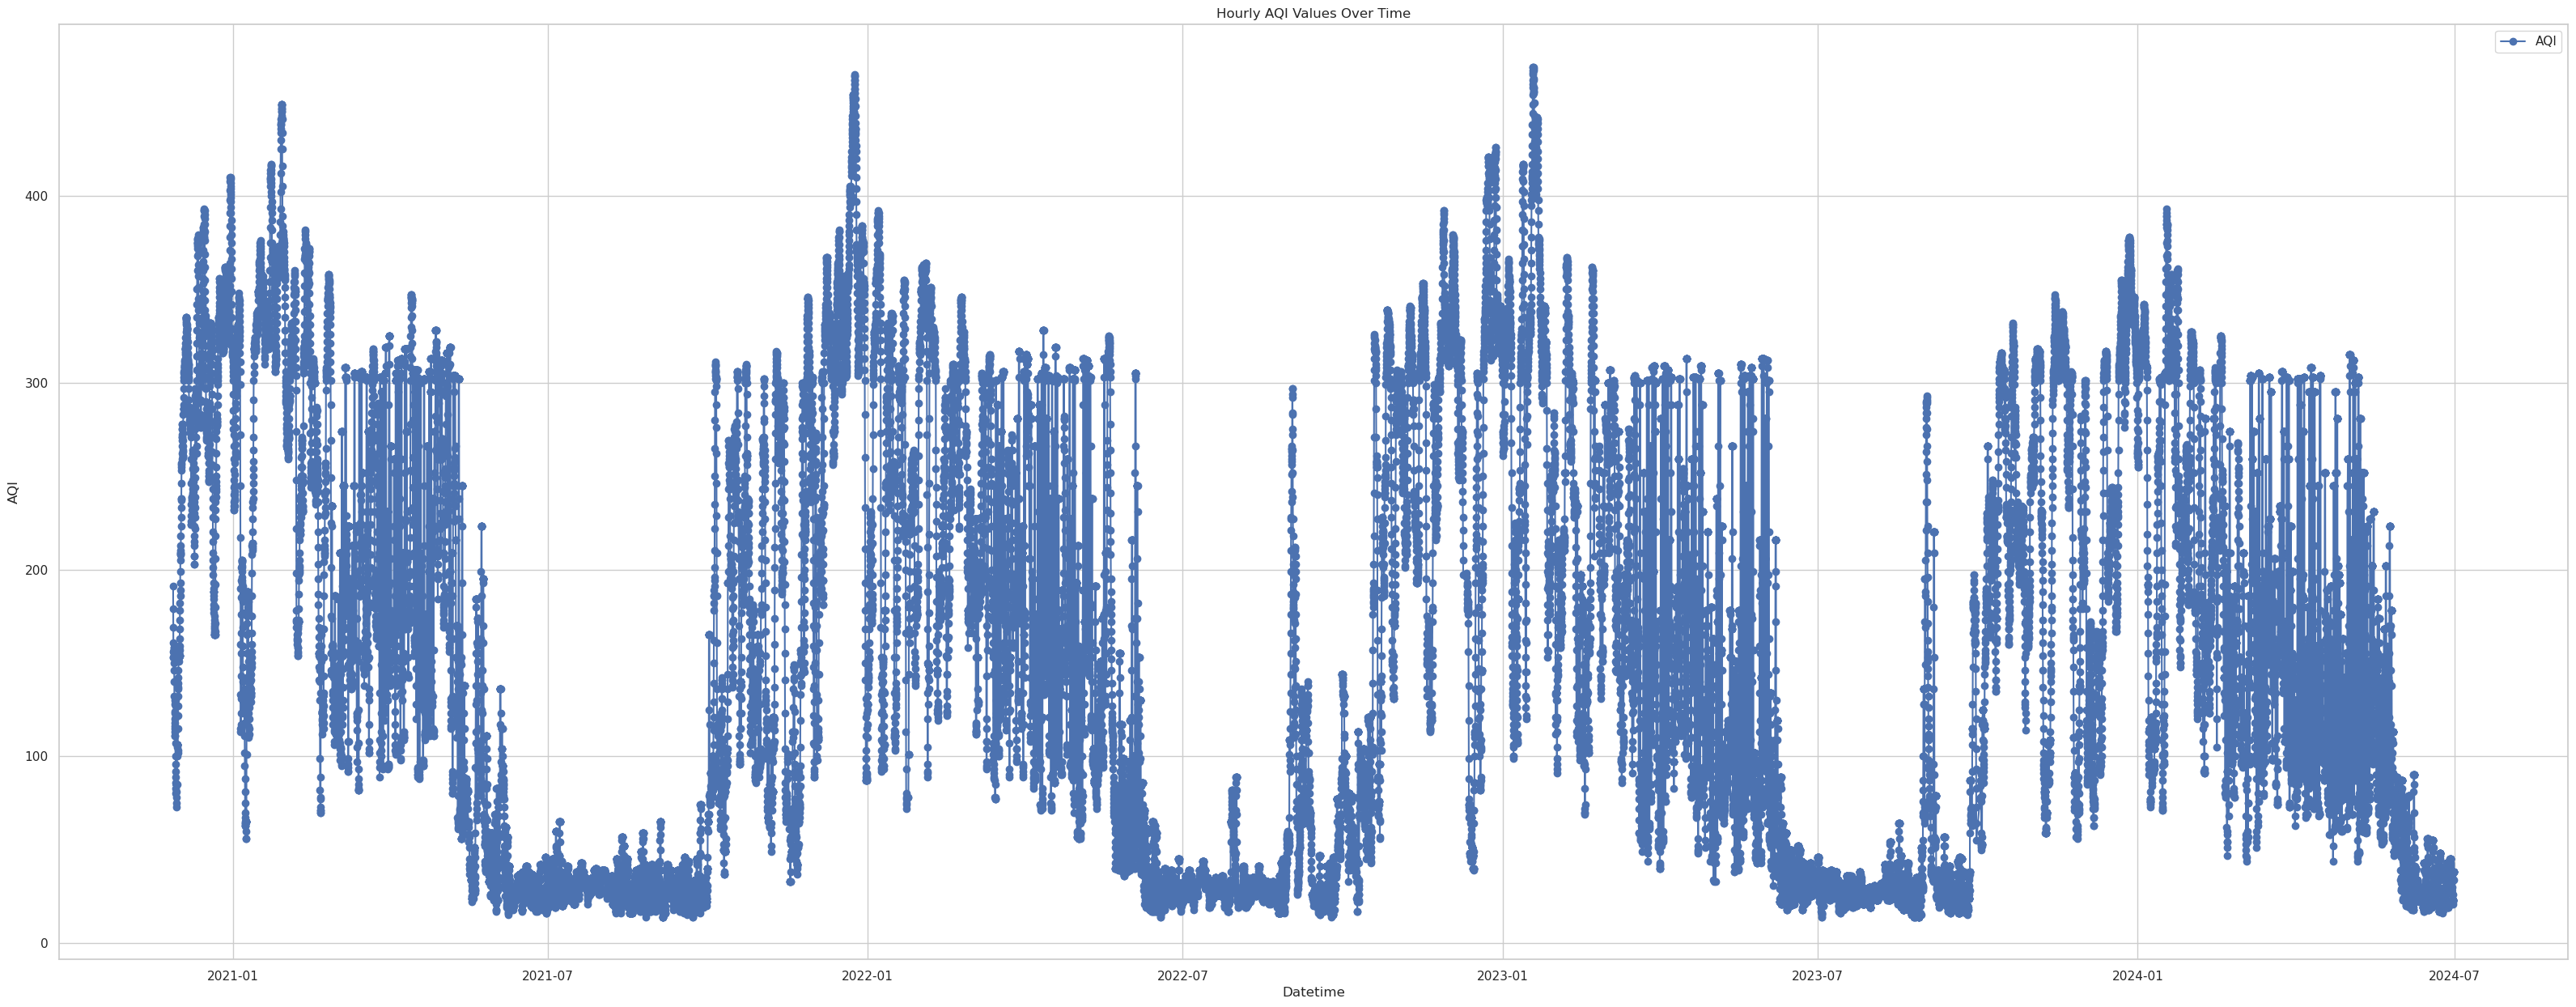

In [96]:
df1 = df
plt.figure(figsize=(40, 15))
plt.plot(df1.index, df1['AQI'], label='AQI', color='b', linestyle='-', marker='o')

plt.title('Hourly AQI Values Over Time')
plt.xlabel('Datetime')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()


In [97]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

# Create aggregated features
def create_aggregated_features(data, n_lags):
    X, y = [], []
    for i in range(n_lags, len(data)):
        aggregated_features = []
        for col in range(data.shape[1] - 1):
            aggregated_features.append(np.mean(data[i-n_lags:i, col]))
            aggregated_features.append(np.std(data[i-n_lags:i, col]))
            aggregated_features.append(np.min(data[i-n_lags:i, col]))
            aggregated_features.append(np.max(data[i-n_lags:i, col]))
        X.append(aggregated_features)
        y.append(data[i, -1])
    return np.array(X), np.array(y)

n_lags = 24

X, y = create_aggregated_features(scaled_data, n_lags)

In [98]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

predicted_aqi = model.predict(X_test)

# Create a zero-filled array for the non-AQI features
num_features = df.shape[1] - 1  # Number of original features excluding AQI
zeros_array = np.zeros((predicted_aqi.shape[0], num_features))

# Concatenate the zeros array with the predicted AQI values for inverse scaling
predicted_aqi_scaled = np.concatenate((zeros_array, predicted_aqi), axis=1)

# Inverse transform the predicted and actual AQI values
predicted_aqi = scaler.inverse_transform(predicted_aqi_scaled)[:, -1]
actual_aqi = scaler.inverse_transform(np.concatenate((zeros_array, y_test.reshape(-1, 1)), axis=1))[:, -1]


Epoch 1/20
699/699 [==============================] - 3s 3ms/step - loss: 0.0148 - val_loss: 0.0024
Epoch 2/20
699/699 [==============================] - 2s 3ms/step - loss: 0.0112 - val_loss: 0.0029
Epoch 3/20
699/699 [==============================] - 2s 3ms/step - loss: 0.0102 - val_loss: 0.0029
Epoch 4/20
699/699 [==============================] - 2s 3ms/step - loss: 0.0099 - val_loss: 0.0025
Epoch 5/20
699/699 [==============================] - 2s 3ms/step - loss: 0.0095 - val_loss: 0.0025
Epoch 6/20
699/699 [==============================] - 2s 3ms/step - loss: 0.0093 - val_loss: 0.0024
Epoch 7/20
699/699 [==============================] - 2s 3ms/step - loss: 0.0090 - val_loss: 0.0024
Epoch 8/20
699/699 [==============================] - 2s 3ms/step - loss: 0.0091 - val_loss: 0.0023
Epoch 9/20
699/699 [==============================] - 2s 3ms/step - loss: 0.0088 - val_loss: 0.0025
Epoch 10/20
699/699 [==============================] - 2s 3ms/step - loss: 0.0087 - val_loss: 0.0024

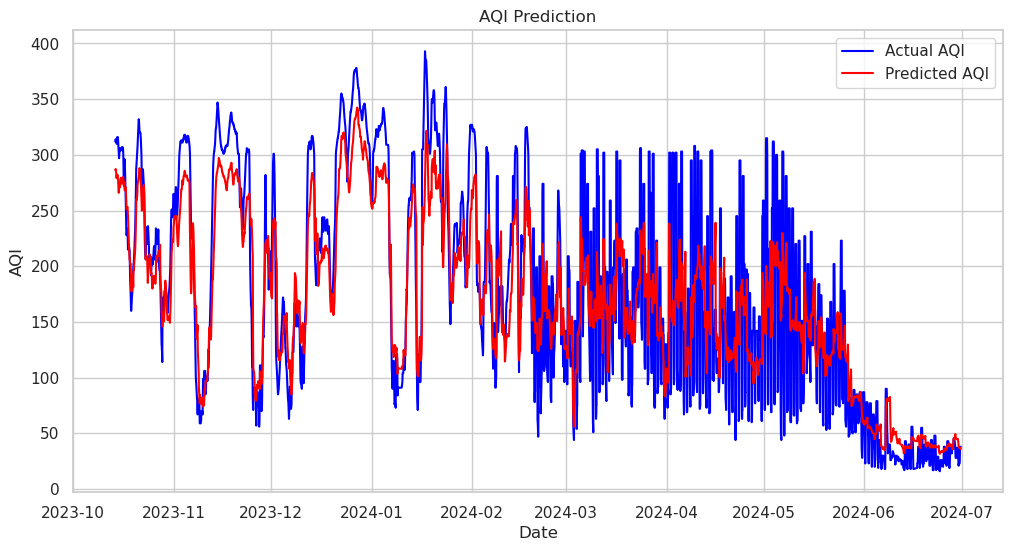

In [99]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(predicted_aqi):], actual_aqi, color='blue', label='Actual AQI')
plt.plot(df.index[-len(predicted_aqi):], predicted_aqi, color='red', label='Predicted AQI')
plt.title('AQI Prediction')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(actual_aqi, predicted_aqi)
print(f'Mean Absolute Error (MAE): {mae:.3f}')

mse = mean_squared_error(actual_aqi, predicted_aqi)
print(f'Mean Squared Error (MSE): {mse:.3f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')

r2 = r2_score(actual_aqi, predicted_aqi)
print(f'R-squared (R²): {r2:.3f}')

Mean Absolute Error (MAE): 36.139
Mean Squared Error (MSE): 2133.344
Root Mean Squared Error (RMSE): 46.188
R-squared (R²): 0.773


In [101]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adding one more layer
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

predicted_aqi = model.predict(X_test)

# Create a zero-filled array for the non-AQI features
num_features = df.shape[1] - 1  # Number of original features excluding AQI
zeros_array = np.zeros((predicted_aqi.shape[0], num_features))

# Concatenate the zeros array with the predicted AQI values for inverse scaling
predicted_aqi_scaled = np.concatenate((zeros_array, predicted_aqi), axis=1)

# Inverse transform the predicted and actual AQI values
predicted_aqi = scaler.inverse_transform(predicted_aqi_scaled)[:, -1]
actual_aqi = scaler.inverse_transform(np.concatenate((zeros_array, y_test.reshape(-1, 1)), axis=1))[:, -1]

Epoch 1/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0168 - val_loss: 0.0027
Epoch 2/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0114 - val_loss: 0.0030
Epoch 3/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0103 - val_loss: 0.0036
Epoch 4/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0097 - val_loss: 0.0027
Epoch 5/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0093 - val_loss: 0.0030
Epoch 6/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0092 - val_loss: 0.0033
Epoch 7/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0089 - val_loss: 0.0029
Epoch 8/20
699/699 [==============================] - 2s 4ms/step - loss: 0.0087 - val_loss: 0.0028
Epoch 9/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0086 - val_loss: 0.0030
Epoch 10/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0085 - val_loss: 0.0035

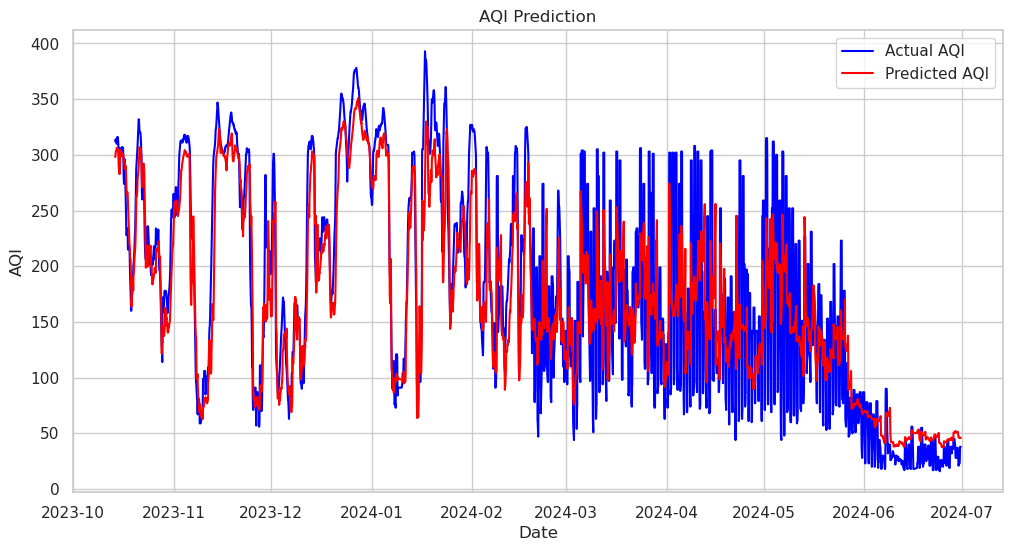

In [102]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(predicted_aqi):], actual_aqi, color='blue', label='Actual AQI')
plt.plot(df.index[-len(predicted_aqi):], predicted_aqi, color='red', label='Predicted AQI')
plt.title('AQI Prediction')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [103]:
mae = mean_absolute_error(actual_aqi, predicted_aqi)
print(f'Mean Absolute Error (MAE): {mae:.3f}')

mse = mean_squared_error(actual_aqi, predicted_aqi)
print(f'Mean Squared Error (MSE): {mse:.3f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')

r2 = r2_score(actual_aqi, predicted_aqi)
print(f'R-squared (R²): {r2:.3f}')

Mean Absolute Error (MAE): 33.609
Mean Squared Error (MSE): 1993.472
Root Mean Squared Error (RMSE): 44.648
R-squared (R²): 0.788


In [104]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1) #Incresaing No. of epochs

predicted_aqi = model.predict(X_test)

# Create a zero-filled array for the non-AQI features
num_features = df.shape[1] - 1  # Number of original features excluding AQI
zeros_array = np.zeros((predicted_aqi.shape[0], num_features))

# Concatenate the zeros array with the predicted AQI values for inverse scaling
predicted_aqi_scaled = np.concatenate((zeros_array, predicted_aqi), axis=1)

# Inverse transform the predicted and actual AQI values
predicted_aqi = scaler.inverse_transform(predicted_aqi_scaled)[:, -1]
actual_aqi = scaler.inverse_transform(np.concatenate((zeros_array, y_test.reshape(-1, 1)), axis=1))[:, -1]


Epoch 1/30
699/699 [==============================] - 3s 4ms/step - loss: 0.0156 - val_loss: 0.0026
Epoch 2/30
699/699 [==============================] - 3s 4ms/step - loss: 0.0110 - val_loss: 0.0023
Epoch 3/30
699/699 [==============================] - 3s 4ms/step - loss: 0.0101 - val_loss: 0.0030
Epoch 4/30
699/699 [==============================] - 3s 4ms/step - loss: 0.0094 - val_loss: 0.0028
Epoch 5/30
699/699 [==============================] - 3s 4ms/step - loss: 0.0092 - val_loss: 0.0021
Epoch 6/30
699/699 [==============================] - 2s 4ms/step - loss: 0.0090 - val_loss: 0.0022
Epoch 7/30
699/699 [==============================] - 3s 4ms/step - loss: 0.0088 - val_loss: 0.0026
Epoch 8/30
699/699 [==============================] - 3s 4ms/step - loss: 0.0087 - val_loss: 0.0021
Epoch 9/30
699/699 [==============================] - 3s 4ms/step - loss: 0.0084 - val_loss: 0.0023
Epoch 10/30
699/699 [==============================] - 3s 4ms/step - loss: 0.0084 - val_loss: 0.0022

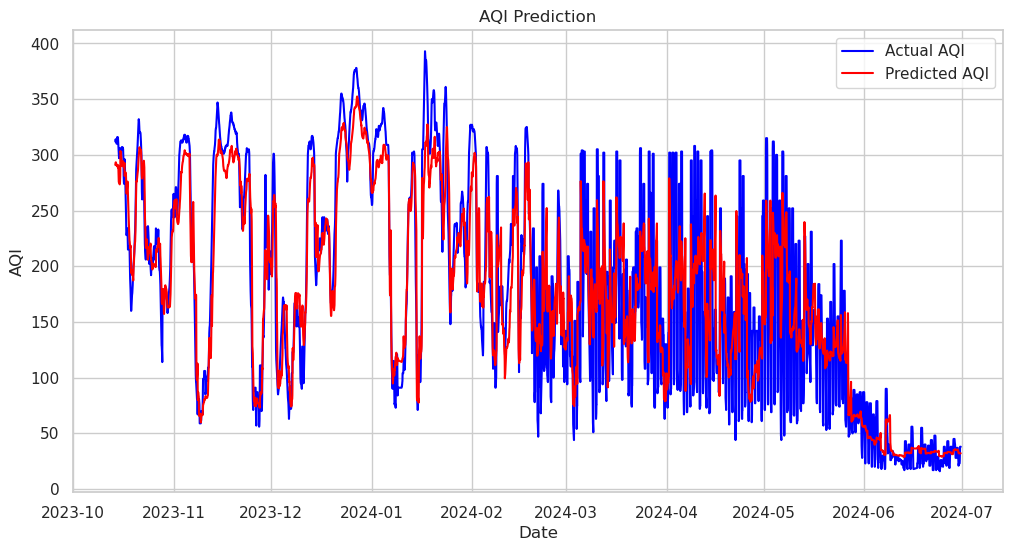

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(predicted_aqi):], actual_aqi, color='blue', label='Actual AQI')
plt.plot(df.index[-len(predicted_aqi):], predicted_aqi, color='red', label='Predicted AQI')
plt.title('AQI Prediction')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [106]:
mae = mean_absolute_error(actual_aqi, predicted_aqi)
print(f'Mean Absolute Error (MAE): {mae:.3f}')

mse = mean_squared_error(actual_aqi, predicted_aqi)
print(f'Mean Squared Error (MSE): {mse:.3f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')

r2 = r2_score(actual_aqi, predicted_aqi)
print(f'R-squared (R²): {r2:.3f}')

Mean Absolute Error (MAE): 31.922
Mean Squared Error (MSE): 1807.390
Root Mean Squared Error (RMSE): 42.513
R-squared (R²): 0.807


In [107]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))  # New 1 more layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1) #Decresaing No. of epochs to 20 again

predicted_aqi = model.predict(X_test)

# Create a zero-filled array for the non-AQI features
num_features = df.shape[1] - 1  # Number of original features excluding AQI
zeros_array = np.zeros((predicted_aqi.shape[0], num_features))

# Concatenate the zeros array with the predicted AQI values for inverse scaling
predicted_aqi_scaled = np.concatenate((zeros_array, predicted_aqi), axis=1)

# Inverse transform the predicted and actual AQI values
predicted_aqi = scaler.inverse_transform(predicted_aqi_scaled)[:, -1]
actual_aqi = scaler.inverse_transform(np.concatenate((zeros_array, y_test.reshape(-1, 1)), axis=1))[:, -1]


Epoch 1/20
699/699 [==============================] - 4s 4ms/step - loss: 0.0195 - val_loss: 0.0043
Epoch 2/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0136 - val_loss: 0.0028
Epoch 3/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0119 - val_loss: 0.0031
Epoch 4/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0109 - val_loss: 0.0033
Epoch 5/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0105 - val_loss: 0.0030
Epoch 6/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0102 - val_loss: 0.0026
Epoch 7/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0099 - val_loss: 0.0025
Epoch 8/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0096 - val_loss: 0.0030
Epoch 9/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0095 - val_loss: 0.0025
Epoch 10/20
699/699 [==============================] - 3s 4ms/step - loss: 0.0093 - val_loss: 0.0029

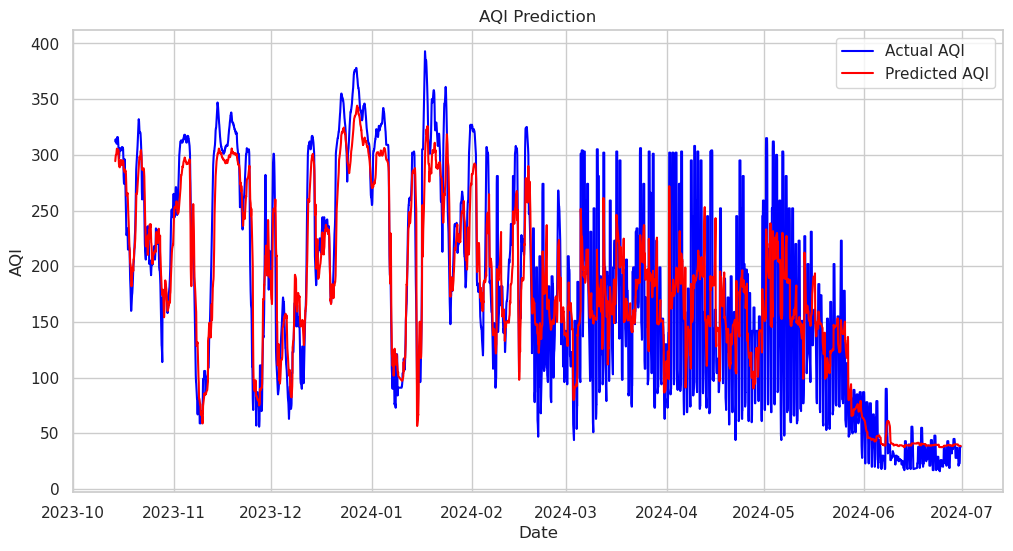

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(predicted_aqi):], actual_aqi, color='blue', label='Actual AQI')
plt.plot(df.index[-len(predicted_aqi):], predicted_aqi, color='red', label='Predicted AQI')
plt.title('AQI Prediction')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [109]:
mae = mean_absolute_error(actual_aqi, predicted_aqi)
print(f'Mean Absolute Error (MAE): {mae:.3f}')

mse = mean_squared_error(actual_aqi, predicted_aqi)
print(f'Mean Squared Error (MSE): {mse:.3f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')

r2 = r2_score(actual_aqi, predicted_aqi)
print(f'R-squared (R²): {r2:.3f}')

Mean Absolute Error (MAE): 32.966
Mean Squared Error (MSE): 1909.190
Root Mean Squared Error (RMSE): 43.694
R-squared (R²): 0.797


From above 4 LSTM models 3rd Model with 4 layers as (128, 64, 32, 1) and 30 epochs give best performace compared to others, so finalizing that model.

In [115]:
features = df.columns[:-1]
target = df.columns[-1]

data = df.values

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_lagged_features(data, n_lags):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i-n_lags:i, :])
        y.append(data[i, -1])
    return np.array(X), np.array(y)

n_lags = 24

split = int(0.8 * len(scaled_data))
train_data = scaled_data[:split]
test_data = scaled_data[split:]

X_train_lstm, y_train_lstm = create_lagged_features(train_data, n_lags)
X_test_lstm, y_test_lstm = create_lagged_features(test_data, n_lags)

model_lstm = Sequential()
model_lstm.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

history_lstm = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=30, batch_size=32, validation_split=0.1)

# Forecasting next 24 hours AQI
forecast_input = X_test_lstm[-1].reshape((1, n_lags, X_train_lstm.shape[2]))  # Use the last available sequence in test data
forecast_aqi = []

for i in range(24):
    next_hour_pred = model_lstm.predict(forecast_input)[0, 0]
    forecast_aqi.append(next_hour_pred)
    forecast_input = np.roll(forecast_input, -1, axis=1)  # Shift input array to the left
    forecast_input[0, -1, -1] = next_hour_pred  # Update last value with predicted AQI

# Convert forecasted AQI to original scale using inverse_transform
forecast_aqi = np.array(forecast_aqi).reshape(-1, 1)

# Concatenate the forecasted AQI with zeros to match the scaler input shape
# The scaler expects the same number of features as it was originally fit on
num_features = scaled_data.shape[1]
forecast_aqi_scaled = np.concatenate((np.zeros((forecast_aqi.shape[0], num_features - 1)), forecast_aqi), axis=1)
forecasted_aqi = scaler.inverse_transform(forecast_aqi_scaled)[:, -1]

# Print or use forecasted_aqi for further analysis
print("Forecasted AQI for the next 24 hours:", forecasted_aqi)

Epoch 1/30
699/699 [==============================] - 29s 40ms/step - loss: 0.0088 - val_loss: 7.6444e-04
Epoch 2/30
699/699 [==============================] - 28s 40ms/step - loss: 0.0043 - val_loss: 0.0013
Epoch 3/30
699/699 [==============================] - 28s 41ms/step - loss: 0.0037 - val_loss: 0.0021
Epoch 4/30
699/699 [==============================] - 28s 41ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 5/30
699/699 [==============================] - 28s 40ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 6/30
699/699 [==============================] - 28s 40ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 7/30
699/699 [==============================] - 28s 40ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 8/30
699/699 [==============================] - 28s 40ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 9/30
346/699 [=============>................] - ETA: 13s - loss: 0.0026

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



699/699 [==============================] - 28s 40ms/step - loss: 0.0023 - val_loss: 0.0040
Epoch 13/30
699/699 [==============================] - 28s 40ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 14/30
699/699 [==============================] - 28s 40ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 15/30
699/699 [==============================] - 28s 40ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 16/30
699/699 [==============================] - 28s 41ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 17/30
699/699 [==============================] - 28s 41ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 18/30
699/699 [==============================] - 29s 41ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 19/30
699/699 [==============================] - 28s 39ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 20/30
699/699 [==============================] - 28s 40ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 21/30
699/699 [==============================] - 29s 41ms/step - loss: 0.0021 -

In [127]:
df.reset_index(inplace=True)
df.head()

datetime  PM2.5_SubIndex  PM10_SubIndex  NO2_SubIndex  \
0 2020-11-27 15:30:00      191.329167      95.139375     10.039062   
1 2020-11-27 16:30:00      179.166667      91.137647      9.666380   
2 2020-11-27 17:30:00      168.942593      87.778889      9.433363   
3 2020-11-27 18:30:00      160.971930      85.159474      9.275616   
4 2020-11-27 19:30:00      155.833333      83.466500      9.165226   

   SO2_SubIndex  CO_SubIndex  O3_SubIndex  NH3_SubIndex    AQI  
0     11.884375      51.4030   102.308824      2.426719  191.0  
1     11.579412      38.3855   102.308824      2.338529  179.0  
2     11.341667      30.7085   102.308824      2.266667  169.0  
3     11.172368      25.3680   102.308824      2.208158  161.0  
4     11.098125      22.0300    85.830000      2.164250  156.0

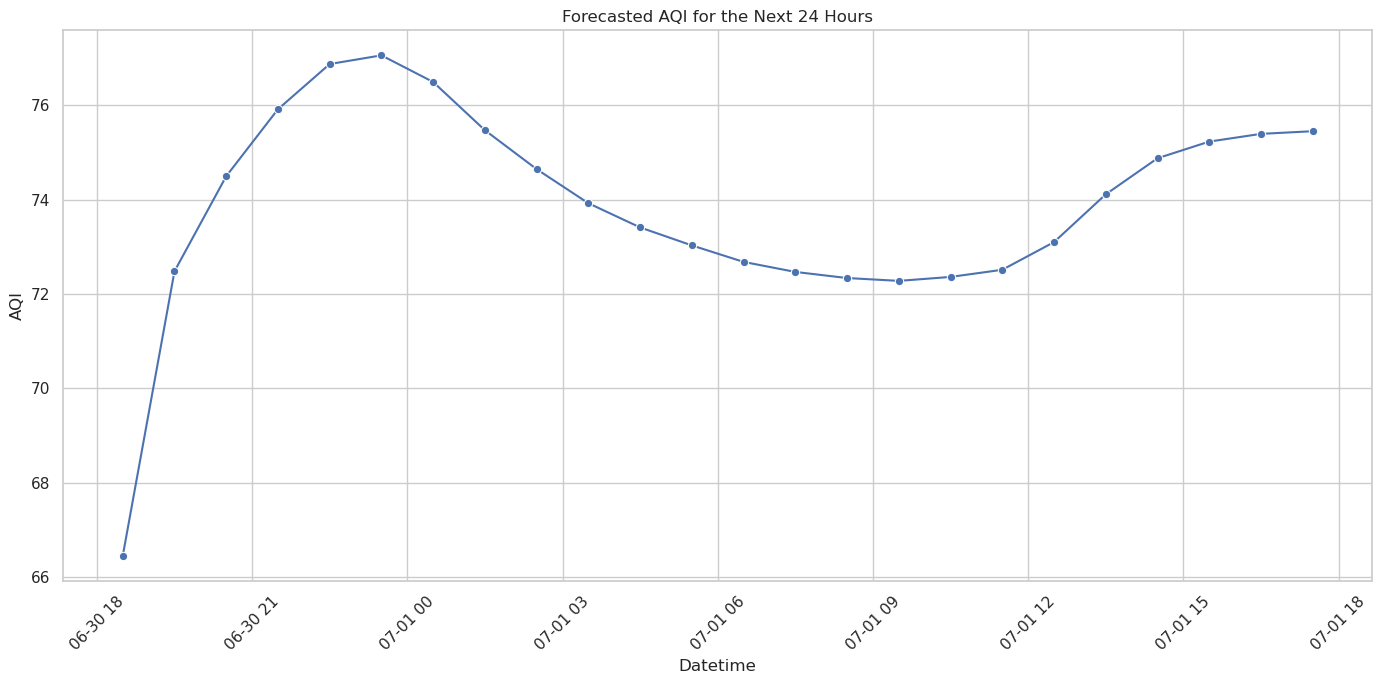

In [128]:
last_datetime = df['datetime'].values[-1]
future_time = pd.date_range(start=last_datetime, periods=25, freq='H')[1:]

forecast_df = pd.DataFrame({
    'Datetime': future_time,
    'AQI': forecasted_aqi
})

plt.figure(figsize=(14, 7))
sns.lineplot(data=forecast_df, x='Datetime', y='AQI', marker='o')
plt.xticks(rotation=45)
plt.title('Forecasted AQI for the Next 24 Hours')
plt.xlabel('Datetime')
plt.ylabel('AQI')
plt.grid(True)
plt.tight_layout()
plt.show()